In [ ]:
# PIL in Detail

In [ ]:
http://pillow.readthedocs.io/en/4.0.x/reference/Image.html
https://pillow.readthedocs.io/en/3.0.0/_modules/PIL/ImageOps.html
https://pillow.readthedocs.io/en/3.0.0/_modules/PIL/ImageOps.html   

In [6]:
from PIL import Image
oldimage = Image.open("crawler1/0010van_gogh.jpg")
palettedata = [0, 0, 0, 102, 102, 102, 176, 176, 176, 255, 255, 255]
newimage = Image.new('P', oldimage.size)
newimage.putpalette(palettedata * 64)
newimage.paste(oldimage, (0, 0) + oldimage.size)
newimage.show()    

In [1]:
from PIL import Image
palettedata = [0, 0, 0, 102, 102, 102, 176, 176, 176, 255, 255, 255]
palimage = Image.new('P', (16, 16))
palimage.putpalette(palettedata * 64)
oldimage = Image.open("crawler1/0010van_gogh.jpg")
newimage = oldimage.quantize(palette=palimage)
newimage.show()

In [2]:
from PIL import Image
oldimage = Image.open("crawler1/0010van_gogh.jpg")
palettedata = [0, 0, 0, 102, 102, 102, 176, 176, 176, 255, 255, 255]
expanded_palettedata = palettedata * 64
newimage = oldimage.convert('P', dither=Image.NONE, palette=palettedata)
newimage.show()

In [5]:
from PIL import Image
oldimage = Image.open("crawler1/0010van_gogh.jpg")
palettedata = [0, 0, 0, 102, 102, 102, 176, 176, 176, 255, 255, 255]
expanded_palettedata = palettedata 
newimage = oldimage.convert('P', dither=Image.NONE, palette=palettedata)
newimage.show()

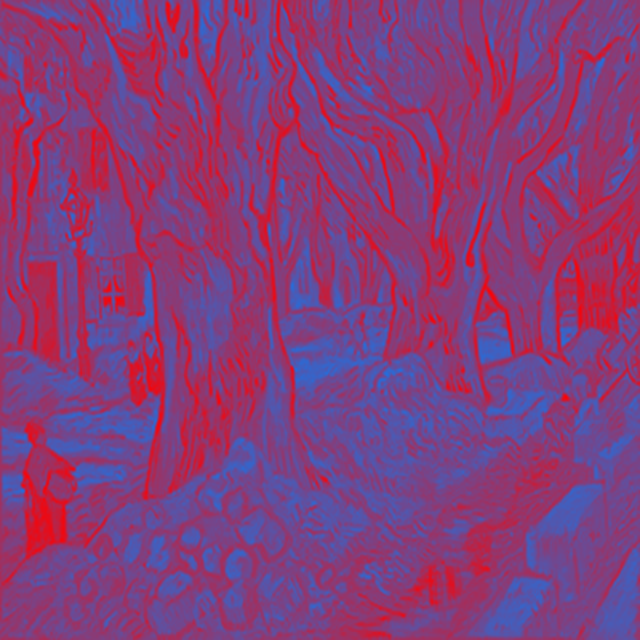

In [48]:
from PIL import Image, ImageOps
im = Image.open("crawler1/0010van_gogh.jpg").convert('LA').convert('RGB')
im.save('junk/gray_van_gogh.jpg')
im = Image.open("junk/gray_van_gogh.jpg").convert('L')
#im.load() # make sure it's loaded into memory
assert im.mode == "L"
# create a lookup table (r, g, b, r, g, b, r, g, b, ...)
lut = []
for i in range(256):
    lut.extend([255-i, i/2, i])
im.putpalette(lut)
assert im.mode == "P" # now has a palette
im.save("out.gif")
im

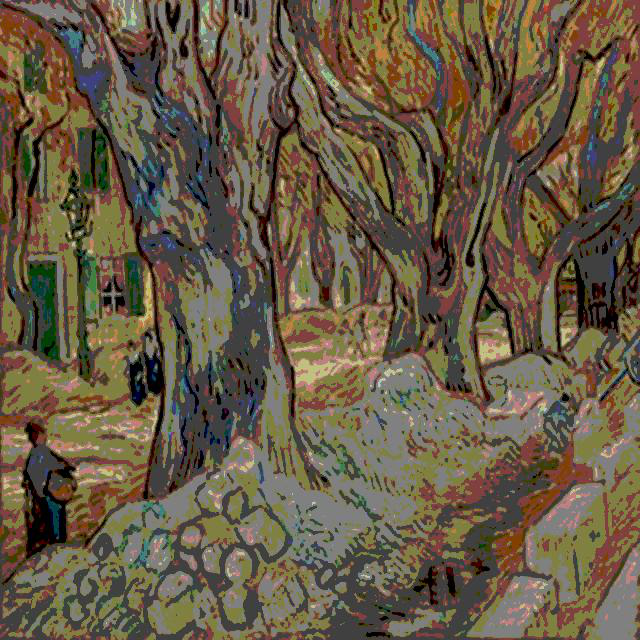

In [59]:
original_path = 'junk/posterize_gogh.jpg'
original = Image.open(original_path)
original

junk/PILStuff20170826172809.png


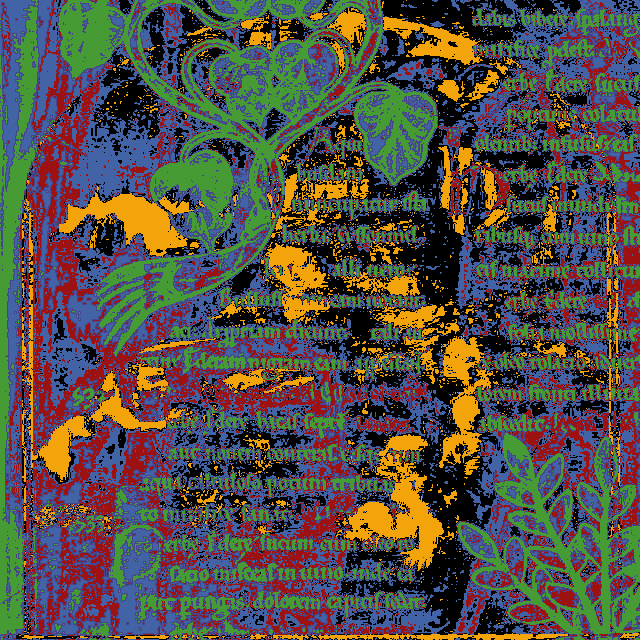

In [257]:
from PIL import Image, ImageFilter
import os
import cv2
import random
import time
path = r"AUGposT/"
#path = r"crawler4/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
filename0=(path+base_image)
im = Image.open(filename0)
imP = im.convert('RGB').convert('P', palette=Image.ADAPTIVE, colors=6)
imP.putpalette([
     243,164,10,
     157,17,17,
     66,99,166,
     70,155,53,
     0,0,0,
     70,70,140,
     ])


im2 = Image.open(filename0)
mask0 = im2.convert('L') # need a greyscale image to create a mask
mask = Image.eval(mask0, lambda a: 255 if a == 0 else 0)
mask = mask.filter(ImageFilter.MinFilter(3))
imP.paste(2, mask) # Paste the color of index 2 using image2 as a mask
filename = time.strftime("junk/PILStuff%Y%m%d%H%M%S.png")
imP.save(filename)

print filename
imP

# USE FOR EXPERIMENT

In [259]:
from PIL import Image, ImageDraw, ImagePalette
list1 =  """ [0,0,0, 255,0,0, 0,255,0, 0,0,255, 125,125,125, 255,255,255,]
"""
palette = '%s' % (list1)
print palette

 [0,0,0, 255,0,0, 0,255,0, 0,0,255, 125,125,125, 255,255,255,]



from bitarray import bitarray
help(bitarray)

junk/PILStuff20170826172423.png


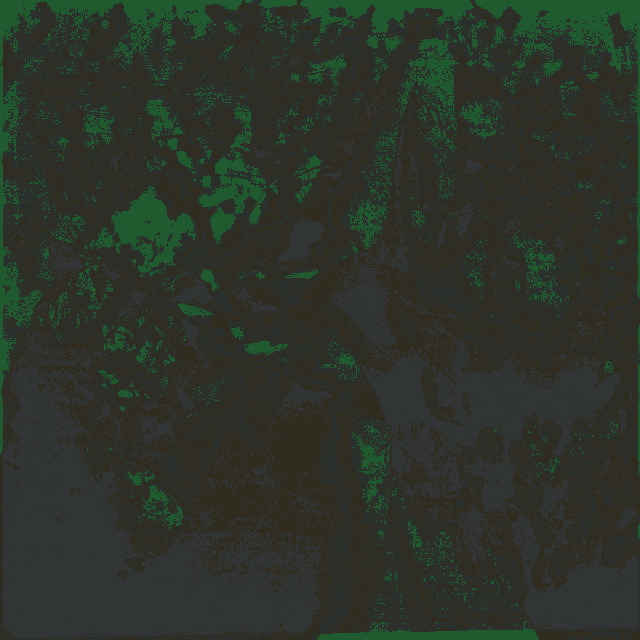

In [255]:
from PIL import Image, ImageFilter
import os
import cv2
import random
import time
path = r"AUGposT/"
#path = r"crawler4/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
filename0=(path+base_image)
im = Image.open(filename0)
imP = im.convert('RGB').convert('P', palette=Image.ADAPTIVE, colors=6)
#imP.putpalette([
#     243,164,10,
#     157,17,17,
#     66,99,166,
#     70,155,53,
#     0,0,0,
#     70,70,140,
#     ])

list1 =  """ [0,0,0, 255,0,0, 0,255,0, 0,0,255, 125,125,125, 255,255,255,]
"""
imP.putpalette('%s' % (list1))




im2 = Image.open(filename0)
mask0 = im2.convert('L') # need a greyscale image to create a mask
mask = Image.eval(mask0, lambda a: 255 if a == 0 else 0)
mask = mask.filter(ImageFilter.MinFilter(3))
imP.paste(2, mask) # Paste the color of index 2 using image2 as a mask
filename = time.strftime("junk/PILStuff%Y%m%d%H%M%S.png")
imP.save(filename)

print filename
imP

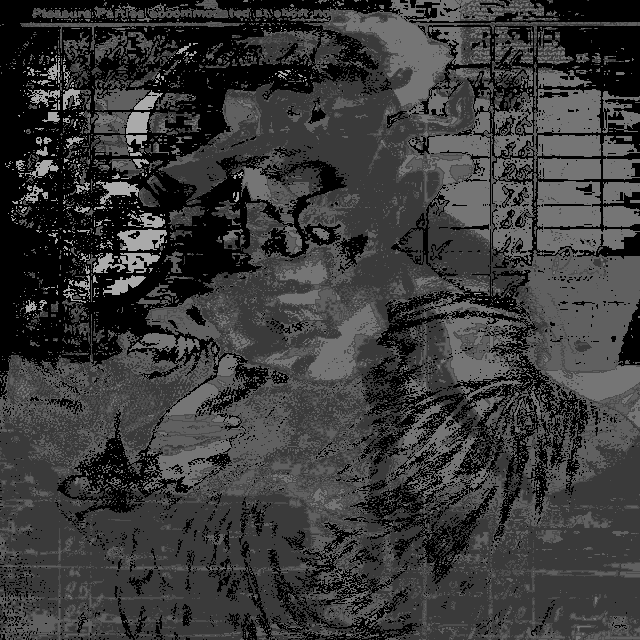

In [126]:
# appears to be NON RGB
from PIL import Image, ImageMath
im1 = Image.open("junk/PILStuff20170826124220.png").convert("L")
im2 = Image.open("junk/YTUG.png").convert("L")
#out = ImageMath.eval("convert(min(a, b), 'RGB')", a=im1, b=im2)
out = ImageMath.eval("convert(min(a, b), 'L')", a=im1, b=im2)
out.save("junk/newResult2.jpg")
out

#  ----- IMPORTANT BREAK THROUGH -----

In [215]:
import numpy as np
from PIL import Image

def palette(img):
    """
    Return palette in descending order of frequency
    """
    arr = np.asarray(img)
    palette, index = np.unique(asvoid(arr).ravel(), return_inverse=True)
    palette = palette.view(arr.dtype).reshape(-1, arr.shape[-1])
    count = np.bincount(index)
    order = np.argsort(count)
    return palette[order[::-1]]

def asvoid(arr):
    """View the array as dtype np.void (bytes)
    This collapses ND-arrays to 1D-arrays, so you can perform 1D operations on them.
    http://stackoverflow.com/a/16216866/190597 (Jaime)
    http://stackoverflow.com/a/16840350/190597 (Jaime)
    Warning:
    >>> asvoid([-0.]) == asvoid([0.])
    array([False], dtype=bool)
    """
    arr = np.ascontiguousarray(arr)
    return arr.view(np.dtype((np.void, arr.dtype.itemsize * arr.shape[-1])))


img = Image.open('junk/PILStuff20170826142340.png', 'r').convert('RGB')
print(palette(img))

[[32 91 48]
 [50 53 53]
 [48 44 32]
 [44 48 44]]


In [247]:
#https://codegolf.stackexchange.com/questions/33172/american-gothic-in-the-palette-of-mona-lisa-rearrange-the-pixels
from PIL import Image

def countColors(image):
    colorCounts = {}
    for color in image.getdata():
        if color in colorCounts:
            colorCounts[color] += 1
        else:
            colorCounts[color] = 1
    return colorCounts

def colorDist(c1, c2):
    def ds(c1, c2, i):
        return (c1[i] - c2[i])**2
    return (ds(c1, c2, 0) + ds(c1, c2, 1) + ds(c1, c2, 2))**0.5

def findClosestColor(palette, color):
    closest = None
    minDist = (3*255**2)**0.5
    for c in palette:
        dist = colorDist(color, c)
        if dist < minDist:
            minDist = dist
            closest = c
    return closest

def removeColor(palette, color):
    if palette[color] == 1:
        del palette[color]
    else:
        palette[color] -= 1

def go(paletteFile, sourceFile):
    palette = countColors(Image.open(paletteFile).convert('RGB'))
    source = Image.open(sourceFile).convert('RGB')
    copy = Image.new('RGB', source.size)
    w, h = copy.size

    for x in range(w):
        for y in range(h):
            c = findClosestColor(palette, source.getpixel((x, y)))
            removeColor(palette, c)
            copy.putpixel((x, y), c)
        #print x #print progress
    copy.save('copy.png')

#the respective file paths go here
go('crawler1/0032sexy.jpg', 'crawler1/0032myth.jpg')
!showme copy.png

KeyboardInterrupt: 

In [263]:
from PIL import Image
import time
def makePixelList(img):
    l = []
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            l.append((x,y))
    return l

lsrc = makePixelList(src_handle)
ldst = makePixelList(dst_handle)

def sortAndDivide(coordlist,pixelimage,channel): #core
    global src,dst,n
    retlist = []
    #sort
    coordlist.sort(key=lambda t: pixelimage[t][channel])
    #divide
    partitionLength = int(len(coordlist)/n)
    if partitionLength <= 0:
        partitionLength = 1
    if channel < 2:
        for i in range(0,len(coordlist),partitionLength):
            retlist += sortAndDivide(coordlist[i:i+partitionLength],pixelimage,channel+1)
    else:
        retlist += coordlist
    return retlist

print(src[lsrc[0]])

lsrc = sortAndDivide(lsrc,src,0)
ldst = sortAndDivide(ldst,dst,0)

for i in range(len(ldst)):
    dst[ldst[i]] = src[lsrc[i]]

#dst_handle.save("exchange"+str(src_index)+str(dst_index)+".png")
filename = time.strftime("junk/exchange%Y%m%d%H%M%S.png")
dst_handle.save(filename)
print filename


(124, 96, 171)
junk/exchange20170826173902.png
No image data


In [264]:
!showme junk/exchange20170826173902.png

In [266]:
from colorthief import ColorThief
import string
import re
color_thief = ColorThief('junk/exchange20170826173902.png')
# build a color palette
palette = color_thief.get_palette(color_count=6)
name = " ".join(str(x) for x in palette)
table = string.maketrans( '', '' )
print name.translate(table,"(){}<>")

115, 121, 202 231, 103, 56 219, 175, 130 169, 91, 124 52, 139, 246 171, 205, 203


In [277]:
from PIL import Image
src = Image.open('junk/aa.png').convert('RGB')
dst = Image.open('junk/bb.png').convert('RGB')


# -- SWAP PALETTES with another image --

In [336]:
import os
import sys
from PIL import Image
aa = Image.open("/home/jack/Documents/MechanicalChaos3.png").convert("RGB")
bb = Image.open("/home/jack/Documents/GG.jpg").convert("RGB")
xx=aa.resize((640,640), Image.NEAREST)
yy=bb.resize((640,640), Image.NEAREST)
xx.save("junk/aa.png")
yy.save("junk/bb.png")
src = Image.open('junk/aa.png').convert('RGB')
dst = Image.open('junk/bb.png').convert('RGB')
src.save("junk/aa.png")
dst.save("junk/bb.png")


In [337]:
src_handle = Image.open("junk/bb.png")
dst_handle = Image.open("junk/aa.png")
x=src_handle.size
y=dst_handle.size
print x, y

(640, 640) (640, 640)


In [338]:
from PIL import Image

n = 5 #number of partitions per channel.


src_handle = Image.open("junk/bb.png")
dst_handle = Image.open("junk/aa.png")
src = src_handle.load()
dst = dst_handle.load()
assert src_handle.size[0]*src_handle.size[1] == dst_handle.size[0]*dst_handle.size[1],"images must be same size"

def makePixelList(img):
    l = []
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            l.append((x,y))
    return l

lsrc = makePixelList(src_handle)
ldst = makePixelList(dst_handle)

def sortAndDivide(coordlist,pixelimage,channel): #core
    global src,dst,n
    retlist = []
    #sort
    coordlist.sort(key=lambda t: pixelimage[t][channel])
    #divide
    partitionLength = int(len(coordlist)/n)
    if partitionLength <= 0:
        partitionLength = 1
    if channel < 2:
        for i in range(0,len(coordlist),partitionLength):
            retlist += sortAndDivide(coordlist[i:i+partitionLength],pixelimage,channel+1)
    else:
        retlist += coordlist
    return retlist

print(src[lsrc[0]])

lsrc = sortAndDivide(lsrc,src,0)
ldst = sortAndDivide(ldst,dst,0)

for i in range(len(ldst)):
    dst[ldst[i]] = src[lsrc[i]]
    
    
filename = time.strftime("junk/exchange%Y%m%d%H%M%S.png")

dst_handle.save(filename)
print filename

(218, 222, 223)
junk/exchange20170826192436.png


In [339]:
!showme junk/exchange20170826192436.png

In [ ]:
pallete_name = 'crawler1/0032myth.jpg'
    source_name = 'crawler1/0032sexy.jpg'
    output_name = 'crawler1/mixOut.jpg'

In [298]:
from PIL import Image, ImageFilter
import colorsys

def getPixels(image):
    width, height = image.size
    pixels = []
    for x in range(width):
        for y in range(height):
            pixels.append([(x,y), image.getpixel((x,y))])
    return pixels

def yiq(pixel):
    # y is the luminance
    y,i,q = colorsys.rgb_to_yiq(pixel[1][0], pixel[1][6], pixel[1][7])
    # Change the weights accordingly to get different results
    return 10*y + 0*i + 0*q

# Open the images
source  = Image.open('junk/aa.png')
pallete = Image.open('junk/bb.png')

# Sharpen the source... It won't affect the palette anyway =D
source = source.filter(ImageFilter.SHARPEN)

# Sort the two lists by luminance
sourcePixels  = sorted(getPixels(source),  key=yiq)
palletePixels = sorted(getPixels(pallete), key=yiq)

copy = Image.new('RGB', source.size)

# Iterate through all the coordinates of source
# And set the new color
index = 0
for sourcePixel in sourcePixels:
    copy.putpixel(sourcePixel[0], palletePixels[index][8])
    index += 1

# Save the result
copy.save('junk/wwcopy.png')

IndexError: tuple index out of range

In [ ]:
!showme copy.png

In [233]:
!ls *.png


average_color.png  out.png	  random_03.png  random_07.png
copy.png	   random_00.png  random_04.png  random_08.png
exchange32.png	   random_01.png  random_05.png  random_09.png
halo.png	   random_02.png  random_06.png  result_bw.png


In [ ]:
Classes ImagePalette

class ImagePalette

__init__(self, mode='RGB', palette=None)
getcolor(self, color)
getdata(self)
save(self, fp)
tostring(self)
 
Functions
load(filename)
negative(mode='RGB')
new(mode, data)
random(mode='RGB')
raw(rawmode, data)
sepia(white='#fff0c0')
wedge(mode='RGB')

junk/PILStuff20170826142340.png


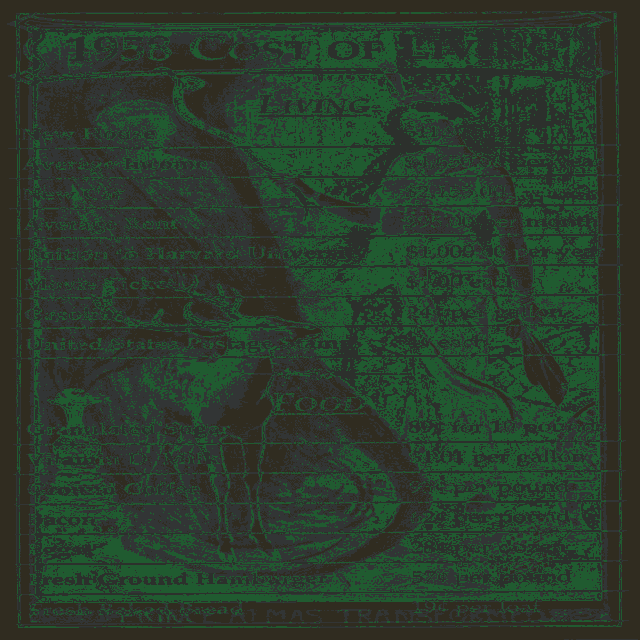

In [193]:
from PIL import Image, ImageFilter
import os
import cv2
import random
import time
path = r"AUGposT/"
#path = r"crawler4/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
filename0=(path+base_image)
im = Image.open(filename0)
imP = im.convert('RGB').convert('P', palette=Image.ADAPTIVE, colors=6)

list1 =  """ [0,0,0, 255,0,0, 0,255,0, 0,0,255, 125,125,125, 255,255,255,]
"""
imP.putpalette('%s' % (list1))


im2 = Image.open(filename0)
mask0 = im2.convert('L') # need a greyscale image to create a mask
mask = Image.eval(mask0, lambda a: 255 if a == 0 else 0)
mask = mask.filter(ImageFilter.MinFilter(3))
imP.paste(2, mask) # Paste the color of index 2 using image2 as a mask
filename = time.strftime("junk/PILStuff%Y%m%d%H%M%S.png")
imP.save(filename)

print filename
imP

junk/PILStuff20170826141511.png


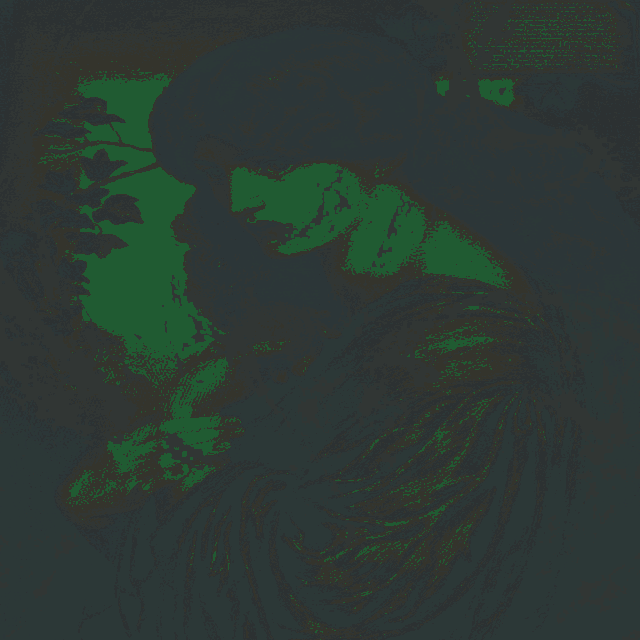

In [187]:
from PIL import Image, ImageFilter
import os
import cv2
import random
import time
"""
path = r"AUGposT/"
#path = r"crawler4/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
filename0=(path+base_image)
im = Image.open(filename0)
"""
im= Image.open('crawler1/0032myth.jpg')
imP = im.convert('RGB').convert('P', palette=Image.ADAPTIVE, colors=6)

list1 =  """ [244,164,12,68,87,154,68,156,52,156,20,20,4,4,4,204,168,84,]
"""
imP.putpalette('%s' % (list1))

#name = 'marcog'
#number = 42
#print '%s %d' % (name, number)

#imP.putpalette(
#[244,164,12,68,87,154,68,156,52,156,20,20,4,4,4,204,168,84,]   
#)
# print "pasting at: (%s, %s)" % (paste_left, paste_top)
im2 = Image.open(filename0)
mask0 = im2.convert('L') # need a greyscale image to create a mask
mask = Image.eval(mask0, lambda a: 255 if a == 0 else 0)
mask = mask.filter(ImageFilter.MinFilter(3))
imP.paste(2, mask) # Paste the color of index 2 using image2 as a mask
filename = time.strftime("junk/PILStuff%Y%m%d%H%M%S.png")
imP.save(filename)

print filename
imP

In [ ]:
from PIL import Image
from optparse import OptionParser


def key_func(arr):
    # Sort the pixels by luminance
    r = 0.2126*arr[0] + 0.7152*arr[1] + 0.0722*arr[2]
    return r


def main():
    # Parse options from the command line
    parser = OptionParser()
    parser.add_option("-p", "--pixels", dest="pixels",
                      help="use pixels from FILE", metavar="FILE")
    parser.add_option("-i", "--input", dest="input", metavar="FILE",
                      help="recreate FILE")
    parser.add_option("-o", "--out", dest="output", metavar="FILE",
                      help="output to FILE", default="output.png")

    (options, args) = parser.parse_args()

    if not options.pixels or not options.input:
        raise Exception("Missing arguments. See help for more info.")

    # Load the images
    im1 = Image.open(options.pixels)
    im2 = Image.open(options.input)

    # Get the images into lists
    px1 = list(im1.getdata())
    px2 = list(im2.getdata())
    w1, h1 = im1.size
    w2, h2 = im2.size

    if w1*h1 != w2*h2:
        raise Exception("Images must have the same number of pixels.")

    # Sort the pixels lists by luminance
    px1_s = sorted(px1, key=key_func)
    px2_s = sorted(px2, key=key_func)

    # Create an array of nothing but black pixels
    arr = [(0, 0, 0)]*w2*h2

    # Create a dict that contains a list of locations with pixel value as key
    # This speeds up the process a lot, since before it was O(n^2)
    locations_cache = {}
    for index, val in enumerate(px2):
        v = str(val)
        if v in locations_cache:
            locations_cache[v].append(index)
        else:
            locations_cache[v] = [index]

    # Loop through each value of the sorted pixels
    for index, val in enumerate(px2_s):
        # Find the original location of the pixel
        # v = px2.index(val)
        v = locations_cache[str(val)].pop(0)
        # Set the value of the array at the given location to the pixel of the
        # equivalent luminance from the source image
        arr[v] = px1_s[index]
        # v2 = px1.index(px1_s[index])
        # Set the value of px2 to an arbitrary value outside of the RGB range
        # This prevents duplicate pixel locations
        # I would use "del px2[v]", but it wouldn't work for some reason
        px2[v] = (512, 512, 512)
        # px1[v2] = (512, 512, 512)
        # Print the percent progress
        print("%f%%" % (index/len(px2)*100))
        """if index % 500 == 0 or index == len(px2_s)-1:
            if h1 > h2:
                size = (w1+w2, h1)
            else:
                size = (w1+w2, h2)
            temp_im1 = Image.new("RGB", im2.size)
            temp_im1.putdata(arr)

            temp_im2 = Image.new("RGB", im1.size)
            temp_im2.putdata(px1)

            temp_im3 = Image.new("RGB", size)
            temp_im3.paste(temp_im1, (0, 0))
            temp_im3.paste(temp_im2, (w2, 0))
            temp_im3.save("still_frames/img_%04d.png" % (index/500))"""

    # Save the image
    im3 = Image.new('RGB', im2.size)
    im3.putdata(arr)
    im3.save(options.output)

if __name__ == '__main__':
    main()


In [188]:
!showme junk/PILStuff20170826124220.png

In [189]:
from colorthief import ColorThief
import string
import re
color_thief = ColorThief('junk/PILStuff20170826124220.png')
# build a color palette
palette = color_thief.get_palette(color_count=6)
name = " ".join(str(x) for x in palette)
table = string.maketrans( '', '' )
newT = name.translate(table,",(){}<>")
palette = newT.replace(" ", ",")
print palette

244,164,12,68,87,154,68,156,52,156,20,20,4,4,4,204,168,84


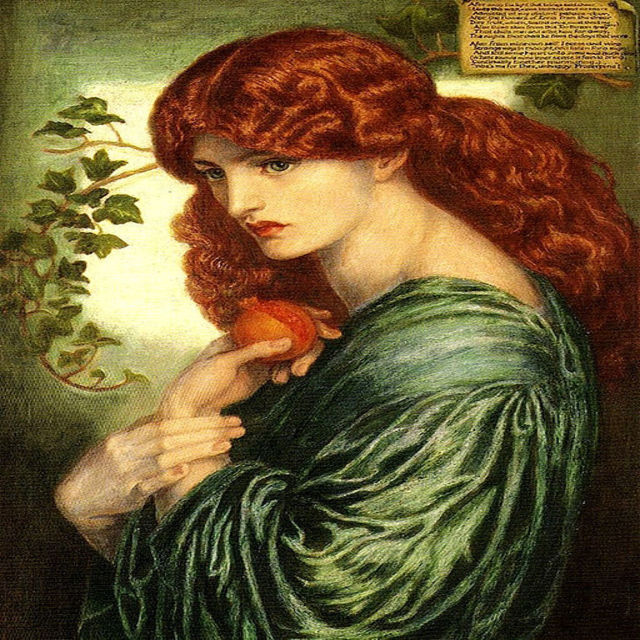

In [166]:
bmp = Image.open('crawler1/0032myth.jpg')
bmp

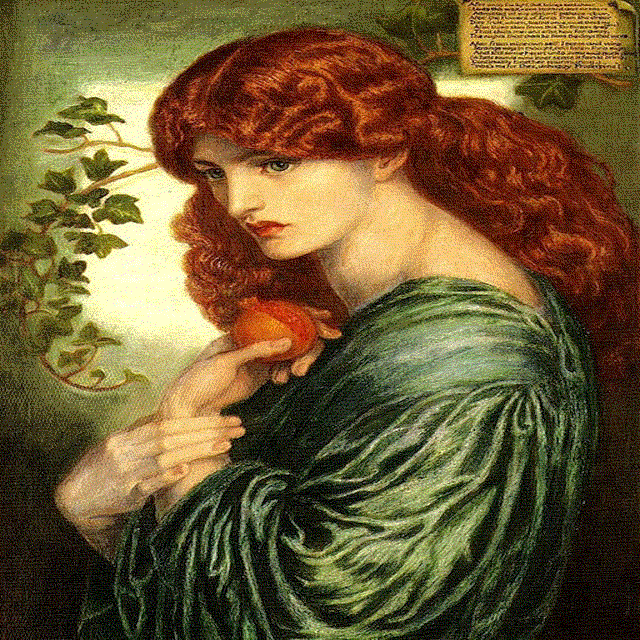

In [167]:
from PIL import Image, ImageFilter
import os
import cv2
import random
import time
bmp = Image.open('crawler1/0032myth.jpg')
bmp_P_web = bmp.convert('P', palette=Image.WEB)
web_palette = bmp_P_web.getpalette()  # <---
data = np.array(bmp_P_web)

# second part
bmp = Image.fromarray(data)
bmp.putpalette(web_palette) 
bmp

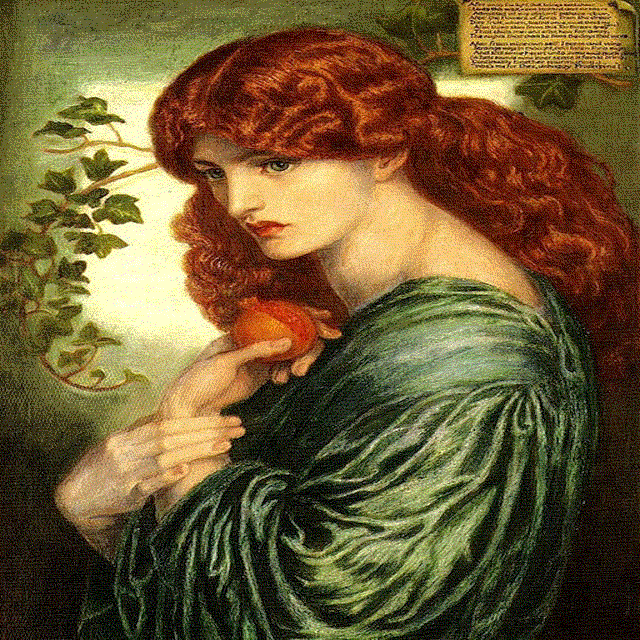

In [167]:
from PIL import Image, ImageFilter
import os
import cv2
import random
import time
list1="""
[244,164,12,68,87,154,68,156,52,156,20,20,4,4,4,204,168,84]
"""


bmp = Image.open('crawler1/0032myth.jpg')
bmp_P_web = bmp.convert('P', palette=Image.WEB)
web_palette = bmp_P_web.getpalette()  # <---
data = np.array(bmp_P_web)

# second part
bmp = Image.fromarray(data)
bmp.putpalette(web_palette) 
bmp

In [161]:
# first part
#bmp = Image.open('junk/PILStuff20170826124220.png')
bmp = Image.open('crawler1/0032myth.jpg')
list1="""
[244,164,12,68,87,154,68,156,52,156,20,20,4,4,4,204,168,84]
"""
bmp_P_web = bmp.convert('P', palette=list1)
web_palette = bmp_P_web.getpalette() 
# <---
data = np.array(bmp_P_web)
data2 = np.array(list1)
print data2



[244,164,12,68,87,154,68,156,52,156,20,20,4,4,4,204,168,84]



In [169]:
import PIL
from PIL import Image
import numpy as np
#web_palette = np.zeros(3*256, int)
web_palette = np.zeros(3*256, int)
print web_palette

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [172]:
import PIL
from PIL import Image
import numpy as np
#web_palette = np.zeros(3*256, int)
web_palette = np.zeros(3*256, int)
web_palette[30:-90] = np.mgrid[0:256:51, 0:256:51, 0:256:51].ravel('F')
pal = web_palette[30:-90] 
print pal

[  0   0   0  51   0   0 102   0   0 153   0   0 204   0   0 255   0   0
   0  51   0  51  51   0 102  51   0 153  51   0 204  51   0 255  51   0
   0 102   0  51 102   0 102 102   0 153 102   0 204 102   0 255 102   0
   0 153   0  51 153   0 102 153   0 153 153   0 204 153   0 255 153   0
   0 204   0  51 204   0 102 204   0 153 204   0 204 204   0 255 204   0
   0 255   0  51 255   0 102 255   0 153 255   0 204 255   0 255 255   0
   0   0  51  51   0  51 102   0  51 153   0  51 204   0  51 255   0  51
   0  51  51  51  51  51 102  51  51 153  51  51 204  51  51 255  51  51
   0 102  51  51 102  51 102 102  51 153 102  51 204 102  51 255 102  51
   0 153  51  51 153  51 102 153  51 153 153  51 204 153  51 255 153  51
   0 204  51  51 204  51 102 204  51 153 204  51 204 204  51 255 204  51
   0 255  51  51 255  51 102 255  51 153 255  51 204 255  51 255 255  51
   0   0 102  51   0 102 102   0 102 153   0 102 204   0 102 255   0 102
   0  51 102  51  51 102 102  51 102 153  51 102 20

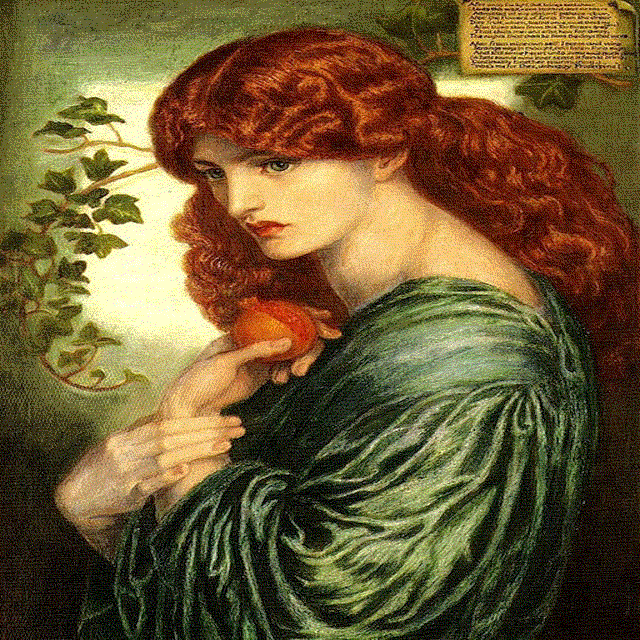

In [176]:
import PIL
from PIL import Image
import numpy as np
#web_palette = np.zeros(3*256, int)
web_palette = np.zeros(3*256, int)
web_palette[30:-90] = np.mgrid[0:256:51, 0:256:51, 0:256:51].ravel('F')
#bmp = Image.open('AUGpost/20170825114404.jpg')
bmp = Image.open('crawler1/0032myth.jpg')
list1 = """
[  0   0   0  51   0   0 102   0   0 153   0   0 204   0   0 255   0   0
   0  51   0  51  51   0 102  51   0 153  51   0 204  51   0 255  51   0
   0 102   0  51 102   0 102 102   0 153 102   0 204 102   0 255 102   0
   0 153   0  51 153   0 102 153   0 153 153   0 204 153   0 255 153   0
   0 204   0  51 204   0 102 204   0 153 204   0 204 204   0 255 204   0
   0 255   0  51 255   0 102 255   0 153 255   0 204 255   0 255 255   0
   0   0  51  51   0  51 102   0  51 153   0  51 204   0  51 255   0  51
   0  51  51  51  51  51 102  51  51 153  51  51 204  51  51 255  51  51
   0 102  51  51 102  51 102 102  51 153 102  51 204 102  51 255 102  51
   0 153  51  51 153  51 102 153  51 153 153  51 204 153  51 255 153  51
   0 204  51  51 204  51 102 204  51 153 204  51 204 204  51 255 204  51
   0 255  51  51 255  51 102 255  51 153 255  51 204 255  51 255 255  51
   0   0 102  51   0 102 102   0 102 153   0 102 204   0 102 255   0 102
   0  51 102  51  51 102 102  51 102 153  51 102 204  51 102 255  51 102
   0 102 102  51 102 102 102 102 102 153 102 102 204 102 102 255 102 102
   0 153 102  51 153 102 102 153 102 153 153 102 204 153 102 255 153 102
   0 204 102  51 204 102 102 204 102 153 204 102 204 204 102 255 204 102
   0 255 102  51 255 102 102 255 102 153 255 102 204 255 102 255 255 102
   0   0 153  51   0 153 102   0 153 153   0 153 204   0 153 255   0 153
   0  51 153  51  51 153 102  51 153 153  51 153 204  51 153 255  51 153
   0 102 153  51 102 153 102 102 153 153 102 153 204 102 153 255 102 153
   0 153 153  51 153 153 102 153 153 153 153 153 204 153 153 255 153 153
   0 204 153  51 204 153 102 204 153 153 204 153 204 204 153 255 204 153
   0 255 153  51 255 153 102 255 153 153 255 153 204 255 153 255 255 153
   0   0 204  51   0 204 102   0 204 153   0 204 204   0 204 255   0 204
   0  51 204  51  51 204 102  51 204 153  51 204 204  51 204 255  51 204
   0 102 204  51 102 204 102 102 204 153 102 204 204 102 204 255 102 204
   0 153 204  51 153 204 102 153 204 153 153 204 204 153 204 255 153 204
   0 204 204  51 204 204 102 204 204 153 204 204 204 204 204 255 204 204
   0 255 204  51 255 204 102 255 204 153 255 204 204 255 204 255 255 204
   0   0 255  51   0 255 102   0 255 153   0 255 204   0 255 255   0 255
   0  51 255  51  51 255 102  51 255 153  51 255 204  51 255 255  51 255
   0 102 255  51 102 255 102 102 255 153 102 255 204 102 255 255 102 255
   0 153 255  51 153 255 102 153 255 153 153 255 204 153 255 255 153 255
   0 204 255  51 204 255 102 204 255 153 204 255 204 204 255 255 204 255
   0 255 255  51 255 255 102 255 255 153 255 255 204 255 255 255 255 255]
"""

bmp_P_web = bmp.convert('P', palette=list1)
web_palette = bmp_P_web.getpalette()  # <---
data = np.array(bmp_P_web)

# second part
bmp = Image.fromarray(data)
bmp.putpalette(web_palette)  # <---



bmp

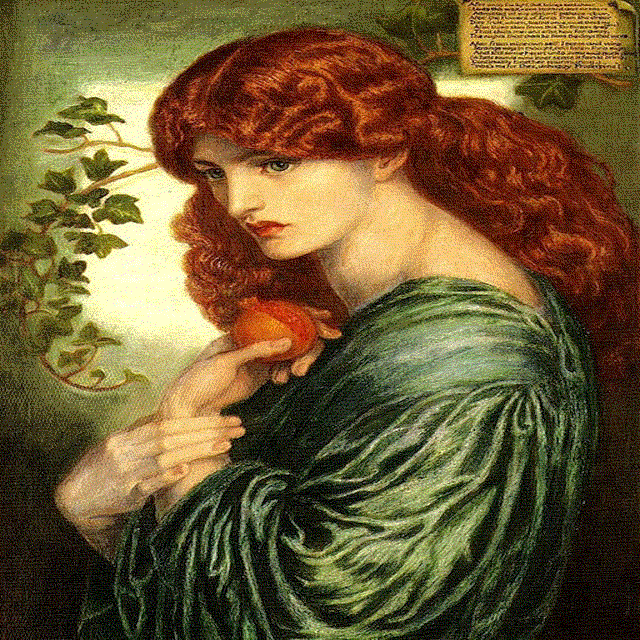

In [179]:
import PIL
from PIL import Image
import numpy as np
#web_palette = np.zeros(3*256, int)
web_palette = np.zeros(3*256, int)
web_palette[30:-90] = np.mgrid[0:256:51, 0:256:51, 0:256:51].ravel('F')
#bmp = Image.open('AUGpost/20170825114404.jpg')
bmp = Image.open('crawler1/0032myth.jpg')
list1 = """
[  0   0   0  51   0   0 102   0   0 153   0   0 204   0   0 255   0   0
   0  51   0  51  51   0 102  51   0 153  51   0 204  51   0 255  51   0
   0 102   0  51 102   0 102 102   0 153 102   0 204 102   0 255 102   0
   0 153   0  51 153   0 102 153   0 153 153   0 204 153   0 255 153   0
   0 204   0  51 204   0 102 204   0 153 204   0 204 204   0 255 204   0
   0 255   0  51 255   0 102 255   0 153 255   0 204 255   0 255 255   0
   0   0  51  51   0  51 102   0  51 153   0  51 204   0  51 255   0  51
   0  51  51  51  51  51 102  51  51 153  51  51 204  51  51 255  51  51
   0 102  51  51 102  51 102 102  51 153 102  51 204 102  51 255 102  51
   0 153  51  51 153  51 102 153  51 153 153  51 204 153  51 255 153  51
   0 204  51  51 204  51 102 204  51 153 204  51 204 204  51 255 204  51
   0 255  51  51 255  51 102 255  51 153 255  51 204 255  51 255 255  51
   0   0 102  51   0 102 102   0 102 153   0 102 204   0 102 255   0 102
   0  51 102  51  51 102 102  51 102 153  51 102 204  51 102 255  51 102
   0 102 102  51 102 102 102 102 102 153 102 102 204 102 102 255 102 102
   0 153 102  51 153 102 102 153 102 153 153 102 204 153 102 255 153 102
   0 204 102  51 204 102 102 204 102 153 204 102 204 204 102 255 204 102
   0 255 102  51 255 102 102 255 102 153 255 102 204 255 102 255 255 102
   0   0 153  51   0 153 102   0 153 153   0 153 204   0 153 255   0 153
   0  51 153  51  51 153 102  51 153 153  51 153 204  51 153 255  51 153
   0 102 153  51 102 153 102 102 153 153 102 153 204 102 153 255 102 153
   0 153 153  51 153 153 102 153 153 153 153 153 204 153 153 255 153 153
   0 204 153  51 204 153 102 204 153 153 204 153 204 204 153 255 204 153
   0 255 153  51 255 153 102 255 153 153 255 153 204 255 153 255 255 153
   0   0 204  51   0 204 102   0 204 153   0 204 204   0 204 255   0 204
   0  51 204  51  51 204 102  51 204 153  51 204 204  51 204 255  51 204
   0 102 204  51 102 204 102 102 204 153 102 204 204 102 204 255 102 204
   0 153 204  51 153 204 102 153 204 153 153 204 204 153 204 255 153 204
   0 204 204  51 204 204 102 204 204 153 204 204 204 204 204 255 204 204
   0 255 204  51 255 204 102 255 204 153 255 204 204 255 204 255 255 204
   0   0 255  51   0 255 102   0 255 153   0 255 204   0 255 255   0 255
   0  51 255  51  51 255 102  51 255 153  51 255 204  51 255 255  51 255
   0 102 255  51 102 255 102 102 255 153 102 255 204 102 255 255 102 255
   0 153 255  51 153 255 102 153 255 153 153 255 204 153 255 255 153 255
   0 204 255  51 204 255 102 204 255 153 204 255 204 204 255 255 204 255
   0 255 255  51 255 255 102 255 255 153 255 255 204 255 255 255 255 255]
"""

bmp_P_web = bmp.convert('P', palette=list1)
web_palette = bmp_P_web.getpalette()  # <---
data = np.array(bmp_P_web)

# second part
bmp = Image.fromarray(data)
bmp.putpalette(web_palette)  # <---



bmp

In [157]:
# first part
#bmp = Image.open('junk/PILStuff20170826124220.png')
bmp = Image.open('AUGpost/20170825114404.jpg')
list1="""
[244,164,12,68,87,154,68,156,52,156,20,20,4,4,4,204,168,84]
"""
bmp_P_web = bmp.convert('P', palette=list1)
web_palette = bmp_P_web.getpalette() 
# <---
data = np.array(bmp_P_web)

#putpalette(data, rawmode='RGB')
# second part
bmp = Image.fromarray(data)
bmp.putpalette(list1, rawmode='RGB') 
bmp

ValueError: illegal image mode

In [ ]:
bmp = Image.fromarray(np.array(dataset).convert('P', palette=Image.WEB))
bmp.save(fn)

In [143]:
!showme junk/PILStuff20170826124220.png

In [137]:
import PIL

In [ ]:
file="/home/jack/Desktop/deep-dream-generator/notebooks/bugs/DemonologyMagic/8405901824_5ff32f4bd8_o-540x362.jpg"

import sys
sys.path.insert(0,"/usr/local/lib/python2.7/dist-packages/")
import normalize
help(normalize)

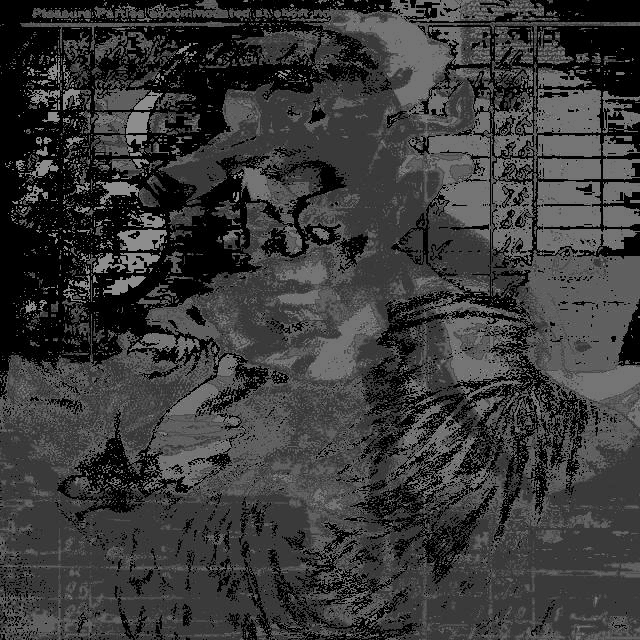

In [127]:
# Works Fine
import PIL
from PIL import Image
file="junk/newResult2.jpg"
im = Image.open(file)
im_web = im.convert("P")
im_256 = im.convert("P", palette=PIL.Image.ADAPTIVE, colors=256)
im_16 = im.convert("P", palette=PIL.Image.ADAPTIVE, colors=16)
im_16

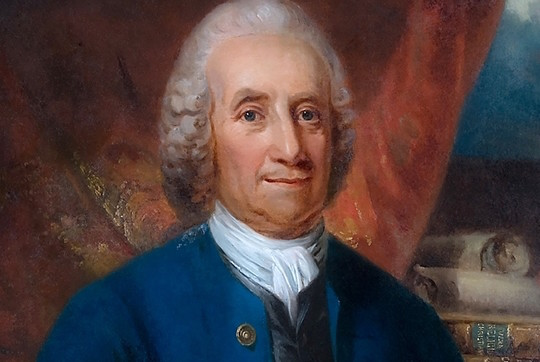

In [102]:
# Works Fine
import PIL
from PIL import Image
file="/home/jack/Desktop/deep-dream-generator/notebooks/bugs/DemonologyMagic/8405901824_5ff32f4bd8_o-540x362.jpg"
im = Image.open(file)
im2 = im.convert("P")
list1 =  """ 123,32,134, 23,185,25, 124,45,45, 273,128,12,
"""
im_16 = im.convert(mode=None, matrix=None, dither=None, palette=list1, colors=4)

#im_16 = im2.convert("P", palette=list, colors=2)
im_16

In [88]:
from __future__ import division
from PIL import Image
original_path="/home/jack/Desktop/deep-dream-generator/notebooks/bugs/DemonologyMagic/8405901824_5ff32f4bd8_o-540x362.jpg"
original = Image.open(original_path)
palette = original.getpalette()
print palette

None


In [134]:
list1 =  """ 123,32,134, 23,185,25, 124,45,45, 273,128,12,
"""

print list1

 123,32,134, 23,185,25, 124,45,45, 273,128,12,



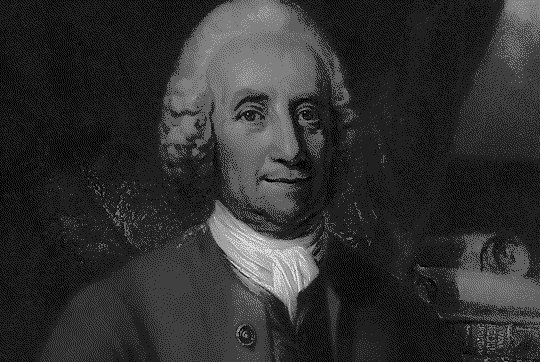

In [93]:
from __future__ import division
from PIL import Image

palette = []
levels = 8
stepsize = 256 // levels
for i in range(256):
    v = i // stepsize * stepsize
    palette.extend((v, v, v))

assert len(palette) == 768
original_path="/home/jack/Desktop/deep-dream-generator/notebooks/bugs/DemonologyMagic/8405901824_5ff32f4bd8_o-540x362.jpg"
original = Image.open(original_path)
converted = Image.new('P', original.size)
converted.putpalette(palette)
converted.paste(original, (0, 0))
#converted.show()
converted

In [95]:
from PIL import Image,ImageOps,ImagePalette
original_path="/home/jack/Desktop/deep-dream-generator/notebooks/bugs/DemonologyMagic/8405901824_5ff32f4bd8_o-540x362.jpg"
im = Image.open(original_path)
ni = ImagePalette(im)

TypeError: 'module' object is not callable

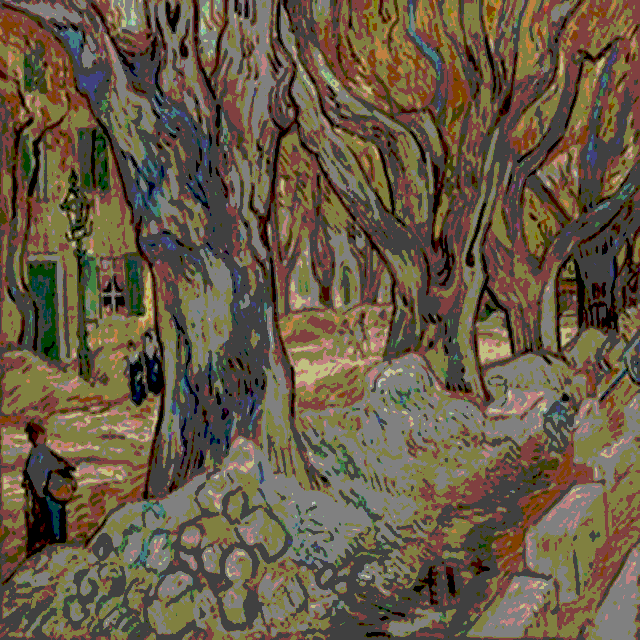

In [50]:
from PIL import Image,ImageOps
im = Image.open("crawler1/0010van_gogh.jpg")
gray = ImageOps.posterize(im, 2)
gray.save("junk/posterize_gogh.jpg")
gray

In [ ]:
# ImageOps.
def _border(border):

def _color(color, mode):

def _lut(image, lut):

def autocontrast(image, cutoff=0, ignore=None):

def colorize(image, black, white):

def crop(image, border=0):

def deform(image, deformer, resample=Image.BILINEAR):

def equalize(image, mask=None):

def expand(image, border=0, fill=0):

def fit(image, size, method=Image.NEAREST, bleed=0.0, centering=(0.5, 0.5)):

def flip(image):

def grayscale(image):

def invert(image):

def mirror(image):

def posterize(image, bits):

def solarize(image, threshold=128):

def gaussian_blur(im, radius=None):

def unsharp_mask(im, radius=None, percent=None, threshold=None):


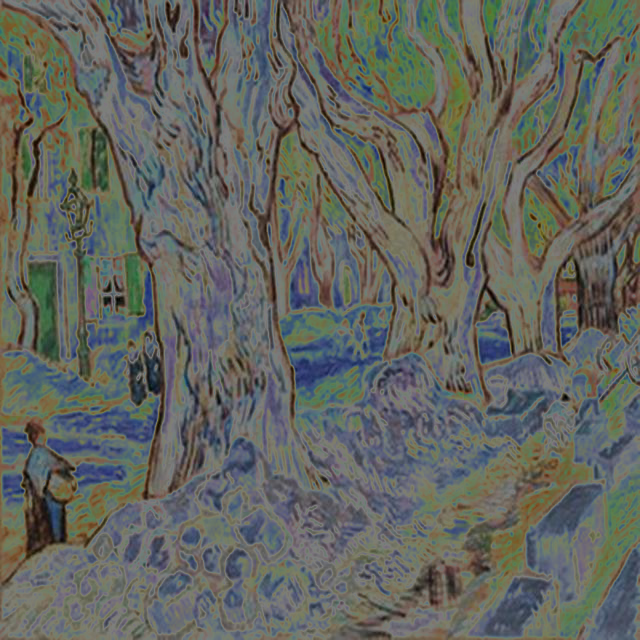

In [45]:
from PIL import Image,ImageOps
im = Image.open("crawler1/0010van_gogh.jpg")
solar=ImageOps.solarize(im, threshold=128)
solar

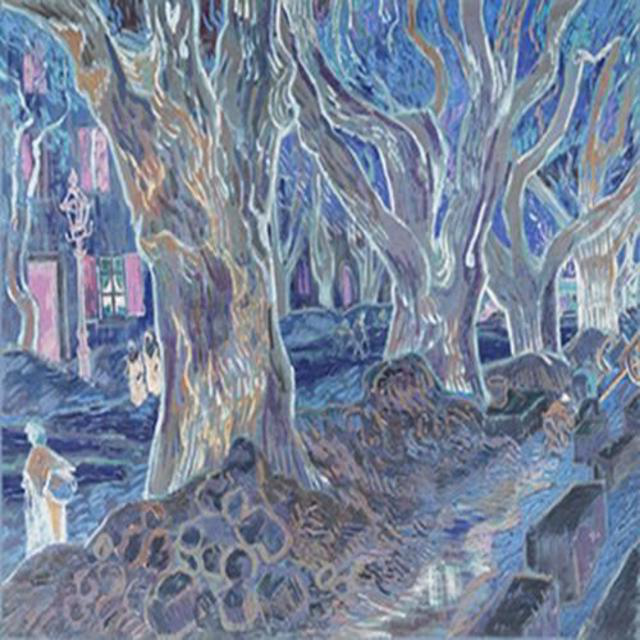

In [34]:
from PIL import Image,ImageOps
im = Image.open("crawler1/0010van_gogh.jpg")
gray = ImageOps.invert(im)
gray

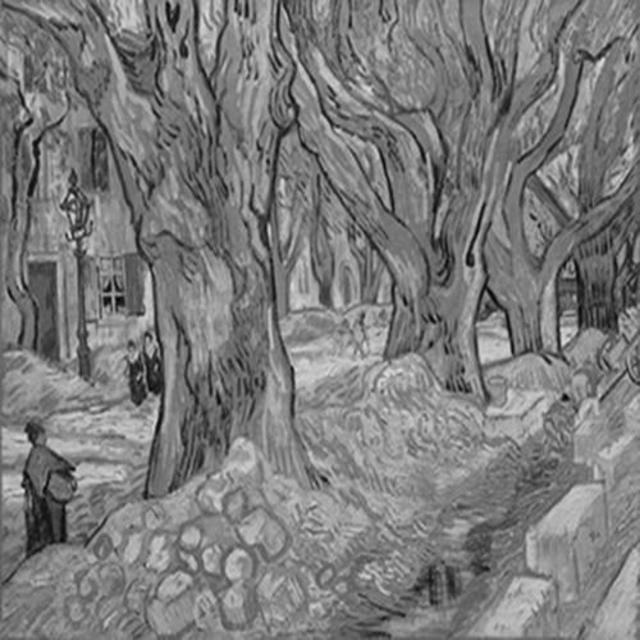

In [33]:
from PIL import Image,ImageOps
im = Image.open("crawler1/0010van_gogh.jpg")
gray = ImageOps.grayscale(im)
gray

In [28]:
from PIL import Image
im = Image.open("crawler1/0010van_gogh.jpg").convert('LA').convert('RGB')
im.save('junk/gray_van_gogh.jpg')

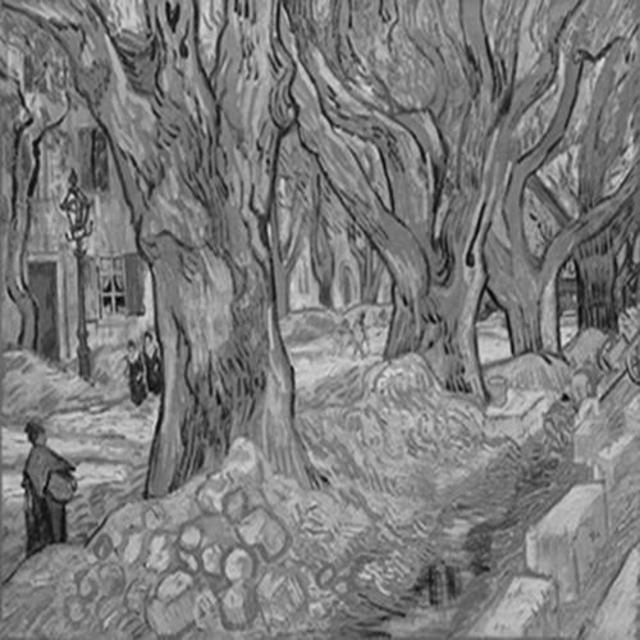

In [27]:
from PIL import Image
im = Image.open("crawler1/0010van_gogh.jpg").convert('LA').convert('RGB')
im.load() # make sure it's loaded into memory
im

In [103]:
from PIL import Image
im = Image.open("crawler1/0010van_gogh.jpg").convert('LA').convert('RGB')
im.load() # make sure it's loaded into memory

assert im.mode == "L"

# create a lookup table (r, g, b, r, g, b, r, g, b, ...)
lut = []
for i in range(256):
    lut.extend([255-i, i/2, i])
im.putpalette(lut)

assert im.mode == "P" # now has a palette

im.save("out.gif")


AssertionError: 

In [ ]:
# ImageDraw Module

The ImageDraw module provide simple 2D graphics for Image objects. 
You can use this module to create new images, annotate or retouch existing images, 
and to generate graphics on the fly for web use.

For a more advanced drawing library for PIL, see the aggdraw module.
Example: Draw a gray cross over an image

from PIL import Image, ImageDraw
im = Image.open("lena.pgm")

draw = ImageDraw.Draw(im)
draw.line((0, 0) + im.size, fill=128)
draw.line((0, im.size[1], im.size[0], 0), fill=128)
del draw

# write to stdout
im.save(sys.stdout, "PNG")

Concepts
Coordinates
The graphics interface uses the same coordinate system as PIL itself, with (0, 0) in the upper left corner.
Colors
To specify colors, you can use numbers or tuples just as you would use with PIL.Image.Image.new() 
or PIL.Image.Image.putpixel(). For “1”, “L”, and “I” images, use integers. For “RGB” images, 
use a 3-tuple containing integer values. For “F” images, use integer or floating point values.

For palette images (mode “P”), use integers as color indexes. In 1.1.4 and later, 
you can also use RGB 3-tuples or color names (see below). The drawing layer will automatically assign color indexes, 
as long as you don’t draw with more than 256 colors.
Color Names
See Color Names for the color names supported by Pillow.
Fonts
PIL can use bitmap fonts or OpenType/TrueType fonts.
Bitmap fonts are stored in PIL’s own format, where each font typically consists of a two files, 
one named .pil and the other usually named .pbm. The former contains font metrics, the latter raster data.
To load a bitmap font, use the load functions in the ImageFont module.
To load a OpenType/TrueType font, use the truetype function in the ImageFont module. 
Note that this function depends on third-party libraries, and may not available in all PIL builds.
Example: Draw Partial Opacity Text

from PIL import Image, ImageDraw, ImageFont
# get an image
base = Image.open('Pillow/Tests/images/lena.png').convert('RGBA')

# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a font
fnt = ImageFont.truetype('Pillow/Tests/fonts/FreeMono.ttf', 40)
# get a drawing context
d = ImageDraw.Draw(txt)

# draw text, half opacity
d.text((10,10), "Hello", font=fnt, fill=(255,255,255,128))
# draw text, full opacity
d.text((10,60), "World", font=fnt, fill=(255,255,255,255))

out = Image.alpha_composite(base, txt)

out.show()

Functions

class PIL.ImageDraw.Draw(im, mode=None)
    Creates an object that can be used to draw in the given image.
    Note that the image will be modified in place.
    Parameters:	
        im – The image to draw in.
        mode – Optional mode to use for color values. For RGB images, this argument can be RGB or RGBA (to blend the drawing into the image). For all other modes, this argument must be the same as the image mode. If omitted, the mode defaults to the mode of the image.

Methods
PIL.ImageDraw.Draw.arc(xy, start, end, fill=None)
    Draws an arc (a portion of a circle outline) between the start and end angles, inside the given bounding box.
    Parameters:	
        xy – Four points to define the bounding box. Sequence of [(x0, y0), (x1, y1)] or [x0, y0, x1, y1].
        start – Starting angle, in degrees. Angles are measured from 3 o’clock, increasing clockwise.
        end – Ending angle, in degrees.
        fill – Color to use for the arc.

PIL.ImageDraw.Draw.bitmap(xy, bitmap, fill=None)
    Draws a bitmap (mask) at the given position, using the current fill color for the non-zero portions. The bitmap should be a valid transparency mask (mode “1”) or matte (mode “L” or “RGBA”).
    This is equivalent to doing image.paste(xy, color, bitmap).
    To paste pixel data into an image, use the paste() method on the image itself.

PIL.ImageDraw.Draw.chord(xy, start, end, fill=None, outline=None)
    Same as arc(), but connects the end points with a straight line.
    Parameters:	

        xy – Four points to define the bounding box. Sequence of [(x0, y0), (x1, y1)] or [x0, y0, x1, y1].
        outline – Color to use for the outline.
        fill – Color to use for the fill.

PIL.ImageDraw.Draw.ellipse(xy, fill=None, outline=None)
    Draws an ellipse inside the given bounding box.
    Parameters:	

        xy – Four points to define the bounding box. Sequence of either [(x0, y0), (x1, y1)] or [x0, y0, x1, y1].
        outline – Color to use for the outline.
        fill – Color to use for the fill.

PIL.ImageDraw.Draw.line(xy, fill=None, width=0)
    Draws a line between the coordinates in the xy list.
    Parameters:	

        xy – Sequence of either 2-tuples like [(x, y), (x, y), ...] or numeric values like [x, y, x, y, ...].
        fill – Color to use for the line.
        width –

        The line width, in pixels. Note that line joins are not handled well, so wide polylines will not look good.

        New in version 1.1.5.

        Note

        This option was broken until version 1.1.6.

PIL.ImageDraw.Draw.pieslice(xy, start, end, fill=None, outline=None)
    Same as arc, but also draws straight lines between the end points and the center of the bounding box.
    Parameters:	

        xy – Four points to define the bounding box. Sequence of [(x0, y0), (x1, y1)] or [x0, y0, x1, y1].
        start – Starting angle, in degrees. Angles are measured from 3 o’clock, increasing clockwise.
        end – Ending angle, in degrees.
        fill – Color to use for the fill.
        outline – Color to use for the outline.

PIL.ImageDraw.Draw.point(xy, fill=None)
    Draws points (individual pixels) at the given coordinates.
    Parameters:	

        xy – Sequence of either 2-tuples like [(x, y), (x, y), ...] or numeric values like [x, y, x, y, ...].
        fill – Color to use for the point.

PIL.ImageDraw.Draw.polygon(xy, fill=None, outline=None)
    Draws a polygon.

    The polygon outline consists of straight lines between the given coordinates, plus a straight line between the last and the first coordinate.
    Parameters:	

        xy – Sequence of either 2-tuples like [(x, y), (x, y), ...] or numeric values like [x, y, x, y, ...].
        outline – Color to use for the outline.
        fill – Color to use for the fill.

PIL.ImageDraw.Draw.rectangle(xy, fill=None, outline=None)
    Draws a rectangle.
    Parameters:	

        xy – Four points to define the bounding box. Sequence of either [(x0, y0), (x1, y1)] or [x0, y0, x1, y1]. The second point is just outside the drawn rectangle.
        outline – Color to use for the outline.
        fill – Color to use for the fill.

PIL.ImageDraw.Draw.shape(shape, fill=None, outline=None)
    Warning

    This method is experimental.

    Draw a shape.

PIL.ImageDraw.Draw.text(xy, text, fill=None, font=None, anchor=None, spacing=0, align="left")
    Draws the string at the given position.
    Parameters:	

        xy – Top left corner of the text.
        text – Text to be drawn. If it contains any newline characters, the text is passed on to multiline_text()
        fill – Color to use for the text.
        font – An ImageFont instance.
        spacing – If the text is passed on to multiline_text(), the number of pixels between lines.
        align – If the text is passed on to multiline_text(), “left”, “center” or “right”.

PIL.ImageDraw.Draw.multiline_text(xy, text, fill=None, font=None, anchor=None, spacing=0, align="left")
    Draws the string at the given position.
    Parameters:	

        xy – Top left corner of the text.
        text – Text to be drawn.
        fill – Color to use for the text.
        font – An ImageFont instance.
        spacing – The number of pixels between lines.
        align – “left”, “center” or “right”.

PIL.ImageDraw.Draw.textsize(text, font=None, spacing=0)
    Return the size of the given string, in pixels.
    Parameters:	

        text – Text to be measured. If it contains any newline characters, the text is passed on to multiline_textsize()
        font – An ImageFont instance.
        spacing – If the text is passed on to multiline_textsize(), the number of pixels between lines.

PIL.ImageDraw.Draw.multiline_textsize(text, font=None, spacing=0)
    Return the size of the given string, in pixels.
    Parameters:	

        text – Text to be measured.
        font – An ImageFont instance.
        spacing – The number of pixels between lines.



In [49]:
from PIL import ImagePalette

In [ ]:
ImagePalette(object)

In [ ]:
#                                 ImagePalette.py#
# The Python Imaging Library.
# $Id$
#
# image palette object
#
# History:
# 1996-03-11 fl   Rewritten.
# 1997-01-03 fl   Up and running.
# 1997-08-23 fl   Added load hack
# 2001-04-16 fl   Fixed randint shadow bug in random()
#
# Copyright (c) 1997-2001 by Secret Labs AB
# Copyright (c) 1996-1997 by Fredrik Lundh
#
# See the README file for information on usage and redistribution.
#

import array
from PIL import ImageColor
from PIL import GimpPaletteFile
from PIL import GimpGradientFile
from PIL import PaletteFile


class ImagePalette(object):
    """
    Color palette for palette mapped images

    :param mode: The mode to use for the Palette. See:
        :ref:`concept-modes`. Defaults to "RGB"
    :param palette: An optional palette. If given, it must be a bytearray,
        an array or a list of ints between 0-255 and of length ``size``
        times the number of colors in ``mode``. The list must be aligned
        by channel (All R values must be contiguous in the list before G
        and B values.) Defaults to 0 through 255 per channel.
    :param size: An optional palette size. If given, it cannot be equal to
        or greater than 256. Defaults to 0.
    """

    def __init__(self, mode="RGB", palette=None, size=0):
        self.mode = mode
        self.rawmode = None  # if set, palette contains raw data
        self.palette = palette or bytearray(range(256))*len(self.mode)
        self.colors = {}
        self.dirty = None
        if ((size == 0 and len(self.mode)*256 != len(self.palette)) or
                (size != 0 and size != len(self.palette))):
            raise ValueError("wrong palette size")

    def copy(self):
        new = ImagePalette()

        new.mode = self.mode
        new.rawmode = self.rawmode
        if self.palette is not None:
            new.palette = self.palette[:]
        new.colors = self.colors.copy()
        new.dirty = self.dirty

        return new

    def getdata(self):
        """
        Get palette contents in format suitable # for the low-level
        ``im.putpalette`` primitive.

        .. warning:: This method is experimental.
        """
        if self.rawmode:
            return self.rawmode, self.palette
        return self.mode + ";L", self.tobytes()

    def tobytes(self):
        """Convert palette to bytes.

        .. warning:: This method is experimental.
        """
        if self.rawmode:
            raise ValueError("palette contains raw palette data")
        if isinstance(self.palette, bytes):
            return self.palette
        arr = array.array("B", self.palette)
        if hasattr(arr, 'tobytes'):
            return arr.tobytes()
        return arr.tostring()

    # Declare tostring as an alias for tobytes
    tostring = tobytes

    def getcolor(self, color):
        """Given an rgb tuple, allocate palette entry.

        .. warning:: This method is experimental.
        """
        if self.rawmode:
            raise ValueError("palette contains raw palette data")
        if isinstance(color, tuple):
            try:
                return self.colors[color]
            except KeyError:
                # allocate new color slot
                if isinstance(self.palette, bytes):
                    self.palette = bytearray(self.palette)
                index = len(self.colors)
                if index >= 256:
                    raise ValueError("cannot allocate more than 256 colors")
                self.colors[color] = index
                self.palette[index] = color[0]
                self.palette[index+256] = color[1]
                self.palette[index+512] = color[2]
                self.dirty = 1
                return index
        else:
            raise ValueError("unknown color specifier: %r" % color)

    def save(self, fp):
        """Save palette to text file.

        .. warning:: This method is experimental.
        """
        if self.rawmode:
            raise ValueError("palette contains raw palette data")
        if isinstance(fp, str):
            fp = open(fp, "w")
        fp.write("# Palette\n")
        fp.write("# Mode: %s\n" % self.mode)
        for i in range(256):
            fp.write("%d" % i)
            for j in range(i*len(self.mode), (i+1)*len(self.mode)):
                try:
                    fp.write(" %d" % self.palette[j])
                except IndexError:
                    fp.write(" 0")
            fp.write("\n")
        fp.close()


# --------------------------------------------------------------------
# Internal

def raw(rawmode, data):
    palette = ImagePalette()
    palette.rawmode = rawmode
    palette.palette = data
    palette.dirty = 1
    return palette


# --------------------------------------------------------------------
# Factories

def make_linear_lut(black, white):
    lut = []
    if black == 0:
        for i in range(256):
            lut.append(white*i//255)
    else:
        raise NotImplementedError  # FIXME
    return lut


def make_gamma_lut(exp):
    lut = []
    for i in range(256):
        lut.append(int(((i / 255.0) ** exp) * 255.0 + 0.5))
    return lut


def negative(mode="RGB"):
    palette = list(range(256))
    palette.reverse()
    return ImagePalette(mode, palette * len(mode))


def random(mode="RGB"):
    from random import randint
    palette = []
    for i in range(256*len(mode)):
        palette.append(randint(0, 255))
    return ImagePalette(mode, palette)


def sepia(white="#fff0c0"):
    r, g, b = ImageColor.getrgb(white)
    r = make_linear_lut(0, r)
    g = make_linear_lut(0, g)
    b = make_linear_lut(0, b)
    return ImagePalette("RGB", r + g + b)


def wedge(mode="RGB"):
    return ImagePalette(mode, list(range(256)) * len(mode))


def load(filename):

    # FIXME: supports GIMP gradients only

    with open(filename, "rb") as fp:

        for paletteHandler in [
            GimpPaletteFile.GimpPaletteFile,
            GimpGradientFile.GimpGradientFile,
            PaletteFile.PaletteFile
        ]:
            try:
                fp.seek(0)
                lut = paletteHandler(fp).getpalette()
                if lut:
                    break
            except (SyntaxError, ValueError):
                # import traceback
                # traceback.print_exc()
                pass
        else:
            raise IOError("cannot load palette")

    return lut  # data, rawmode


In [ ]:
# ImageFont Module

The ImageFont module defines a class with the same name. Instances of this class store bitmap fonts, 
and are used with the PIL.ImageDraw.Draw.text() method.
PIL uses its own font file format to store bitmap fonts. You can use the :command`pilfont` 
utility to convert BDF and PCF font descriptors (X window font formats) to this format.
Starting with version 1.1.4, PIL can be configured to support TrueType and OpenType fonts 
(as well as other font formats supported by the FreeType library). For earlier versions, TrueType support is only available as part of the imToolkit package


from PIL import ImageFont, ImageDraw
draw = ImageDraw.Draw(image)

# use a bitmap font
font = ImageFont.load("arial.pil")

draw.text((10, 10), "hello", font=font)
# use a truetype font
font = ImageFont.truetype("arial.ttf", 15)

draw.text((10, 25), "world", font=font)
Functions

PIL.ImageFont.load(filename)
    Load a font file. This function loads a font object from the given bitmap font file, and returns 
    the corresponding font object.
    Parameters:	filename – Name of font file.
    Returns:	A font object.
    Raises:	IOError – If the file could not be read.

PIL.ImageFont.load_path(filename)
    Load font file. Same as load(), but searches for a bitmap font along the Python path.
    Parameters:	filename – Name of font file.
    Returns:	A font object.
    Raises:	IOError – If the file could not be read.

PIL.ImageFont.truetype(font=None, size=10, index=0, encoding='')
    Load a TrueType or OpenType font file, and create a font object. This function loads a font object 
    from the given file, and creates a font object for a font of the given size.

    This function requires the _imagingft service.
    Parameters:	

        font – A truetype font file. Under Windows, if the file is not found in this filename, the loader 
        also looks in Windows fonts/ directory.
        size – The requested size, in points.
        index – Which font face to load (default is first available face).
        encoding – Which font encoding to use (default is Unicode). Common encodings are “unic” (Unicode), 
        “symb” (Microsoft Symbol), “ADOB” (Adobe Standard), “ADBE” (Adobe Expert), and “armn” (Apple Roman). 
        See the FreeType documentation for more information.
    Returns:	
    A font object.

PIL.ImageFont.load_default()
    Load a “better than nothing” default font.
    New in version 1.1.4.
    Returns:	A font object.

Methods:
PIL.ImageFont.ImageFont.getsize(text)
    Returns:	(width, height)

PIL.ImageFont.ImageFont.getmask(text, mode='')
    Create a bitmap for the text.
    If the font uses antialiasing, the bitmap should have mode “L” and use a maximum value of 255. 
    Otherwise, it should have mode “1”.
    Parameters:	
        text – Text to render.
        mode –
        Used by some graphics drivers to indicate what mode the driver prefers; if empty, 
        the renderer may return either mode. Note that the mode is always a string, to simplify C-level 
    implementations.
        New in version 1.1.5.

    Returns:	
    An internal PIL storage memory instance as defined by the PIL.Image.core interface module.

In [ ]:
# ImageChops (“Channel Operations”) Module

At this time, most channel operations are only implemented for 8-bit images (e.g. “L” and “RGB”).


Most channel operations take one or two image arguments and returns a new image. 
Unless otherwise noted, the result of a channel operation is always clipped to the range 0 to MAX 
(which is 255 for all modes supported by the operations in this module).

PIL.ImageChops.add(image1, image2, scale=1.0, offset=0)

    Adds two images, dividing the result by scale and adding the offset. 
    If omitted, scale defaults to 1.0, and offset to 0.0.
    out = ((image1 + image2) / scale + offset)

PIL.ImageChops.add_modulo(image1, image2)
    Add two images, without clipping the result.
    out = ((image1 + image2) % MAX)

PIL.ImageChops.blend(image1, image2, alpha)
    Blend images using constant transparency weight. Alias for PIL.Image.Image.blend().

PIL.ImageChops.composite(image1, image2, mask)
    Create composite using transparency mask. Alias for PIL.Image.Image.composite().

PIL.ImageChops.constant(image, value)
    Fill a channel with a given grey level.

PIL.ImageChops.darker(image1, image2)
    Compares the two images, pixel by pixel, and returns a new image containing the darker values.
    out = min(image1, image2)

PIL.ImageChops.difference(image1, image2)
    Returns the absolute value of the pixel-by-pixel difference between the two images.
    out = abs(image1 - image2)

PIL.ImageChops.duplicate(image)
    Copy a channel. Alias for PIL.Image.Image.copy().

PIL.ImageChops.invert(image)
    Invert an image (channel).
    out = MAX - image

PIL.ImageChops.lighter(image1, image2)
    Compares the two images, pixel by pixel, and returns a new image containing the lighter values.
    out = max(image1, image2)

PIL.ImageChops.logical_and(image1, image2)
    Logical AND between two images.
    out = ((image1 and image2) % MAX)

PIL.ImageChops.logical_or(image1, image2)
    Logical OR between two images.
    out = ((image1 or image2) % MAX)

PIL.ImageChops.multiply(image1, image2)
    Superimposes two images on top of each other.
    If you multiply an image with a solid black image, the result is black. 
    If you multiply with a solid white image, the image is unaffected.
    out = image1 * image2 / MAX

PIL.ImageChops.offset(image, xoffset, yoffset=None)
    Returns a copy of the image where data has been offset by the given distances. 
    Data wraps around the edges. If yoffset is omitted, it is assumed to be equal to xoffset.
    Parameters:	
        xoffset – The horizontal distance.
        yoffset – The vertical distance. If omitted, both distances are set to the same value.

PIL.ImageChops.screen(image1, image2)
    Superimposes two inverted images on top of each other.
    out = MAX - ((MAX - image1) * (MAX - image2) / MAX)

PIL.ImageChops.subtract(image1, image2, scale=1.0, offset=0)
    Subtracts two images, dividing the result by scale and adding the offset. If omitted, scale defaults to 1.0, and offset to 0.0.
    out = ((image1 - image2) / scale + offset)

PIL.ImageChops.subtract_modulo(image1, image2)
    Subtract two images, without clipping the result.
    out = ((image1 - image2) % MAX)



In [ ]:
# ImageEnhance Module

The ImageEnhance can be used for image enhancement.

from PIL import ImageEnhance
enhancer = ImageEnhance.Sharpness(image)
for i in range(8):
    factor = i / 4.0
    enhancer.enhance(factor).show("Sharpness %f" % factor)

Also see the enhancer.py demo program in the Scripts/ directory.
Classes

All enhancement classes implement a common interface, containing a single method:

class PIL.ImageEnhance._Enhance
    enhance(factor)
    Returns an enhanced image.
    Parameters:	factor – A floating point value controlling the enhancement. Factor 1.0 always returns a copy of the original image, lower factors mean less color (brightness, contrast, etc), and higher values more. There are no restrictions on this value.
    Return type:	Image

class PIL.ImageEnhance.Color(image)
    Adjust image color balance.
    This class can be used to adjust the colour balance of an image, in a manner similar to the 
    controls on a colour TV set. An enhancement factor of 0.0 gives a black and white image. 
    A factor of 1.0 gives the original image.
    
class PIL.ImageEnhance.Contrast(image)
    Adjust image contrast.
    This class can be used to control the contrast of an image, similar to the contrast control 
    on a TV set. An enhancement factor of 0.0 gives a solid grey image. A factor of 1.0 gives the original image.

class PIL.ImageEnhance.Brightness(image)
    Adjust image brightness.
    This class can be used to control the brightness of an image. 
    An enhancement factor of 0.0 gives a black image. A factor of 1.0 gives the original image.

class PIL.ImageEnhance.Sharpness(image)
    Adjust image sharpness.
    This class can be used to adjust the sharpness of an image. 
    An enhancement factor of 0.0 gives a blurred image, a factor of 1.0 gives the original image, 
    and a factor of 2.0 gives a sharpened image.



In [ ]:
# ImageMath Module

The ImageMath module can be used to evaluate “image expressions”. 
The module provides a single eval function, which takes an expression string and one or more images.
Example: Using the ImageMath module

from PIL import Image, ImageMath

im1 = Image.open("image1.jpg")
im2 = Image.open("image2.jpg")

out = ImageMath.eval("convert(min(a, b), 'L')", a=im1, b=im2)
out.save("result.png")

PIL.ImageMath.eval(expression, environment)
    Evaluate expression in the given environment.
    In the current version, ImageMath only supports single-layer images. To process multi-band images, 
    use the split() method or merge() function.
    Parameters:	
        expression – A string which uses the standard Python expression syntax. In addition to the standard operators, you can also use the functions described below.
        environment – A dictionary that maps image names to Image instances. You can use one or more keyword arguments instead of a dictionary, as shown in the above example. Note that the names must be valid Python identifiers.

    Returns:	
    An image, an integer value, a floating point value, or a pixel tuple, depending on the expression.

Expression syntax
Expressions are standard Python expressions, but they’re evaluated in a non-standard environment. 
You can use PIL methods as usual, plus the following set of operators and functions:
Standard Operators
You can use standard arithmetical operators for addition (+), subtraction (-), multiplication (*), 
and division (/).

The module also supports unary minus (-), modulo (%), and power (**) operators.
Note that all operations are done with 32-bit integers or 32-bit floating point values, as necessary. For example, if you add two 8-bit images, the result will be a 32-bit integer image. If you add a floating point constant to an 8-bit image, the result will be a 32-bit floating point image.

You can force conversion using the convert(), float(), and int() functions described below.
Bitwise Operators

The module also provides operations that operate on individual bits. This includes and (&), or (|), 
and exclusive or (^). You can also invert (~) all pixel bits.
Note that the operands are converted to 32-bit signed integers before the bitwise operation is applied. 
This means that you’ll get negative values if you invert an ordinary greyscale image. 
You can use the and (&) operator to mask off unwanted bits.

Bitwise operators don’t work on floating point images.
Logical Operators

Logical operators like and, or, and not work on entire images, rather than individual pixels.

An empty image (all pixels zero) is treated as false. All other images are treated as true.

Note that and and or return the last evaluated operand, while not always returns a boolean value.
Built-in Functions

These functions are applied to each individual pixel.

abs(image)
    Absolute value.

convert(image, mode)
    Convert image to the given mode. The mode must be given as a string constant.

float(image)
    Convert image to 32-bit floating point. This is equivalent to convert(image, “F”).

int(image)
    Convert image to 32-bit integer. This is equivalent to convert(image, “I”).
    Note that 1-bit and 8-bit images are automatically converted to 32-bit integers if necessary to get a correct result.

max(image1, image2)
    Maximum value.

min(image1, image2)
    Minimum value.



In [ ]:
# ImageColor Module

The ImageColor module supports the following string formats:
    Hexadecimal color specifiers, given as #rgb or #rrggbb. For example, #ff0000 specifies pure red.
    RGB functions, given as rgb(red, green, blue) where the color values are integers in the range 0 to 255.
    Alternatively, the color values can be given as three percentages (0% to 100%). 
    For example, rgb(255,0,0) and rgb(100%,0%,0%) both specify pure red.
    Hue-Saturation-Lightness (HSL) functions, given as hsl(hue, saturation%, lightness%) where hue 
    is the color given as an angle between 0 and 360 (red=0, green=120, blue=240), 
    saturation is a value between 0% and 100% (gray=0%, full color=100%), and lightness is a 
    value between 0% and 100% (black=0%, normal=50%, white=100%). For example, hsl(0,100%,50%) is pure red.
    Common HTML color names. The ImageColor module provides some 140 standard color names, 
    based on the colors supported by the X Window system and most web browsers. color names 
    are case insensitive. For example, red and Red both specify pure red.
    
PIL.ImageColor.getrgb(color)

    Convert a color string to an RGB tuple. If the string cannot be parsed, this function raises a 
    ValueError exception.
    Parameters:	color – A color string

PIL.ImageColor.getcolor(color, mode)

    Same as getrgb(), but converts the RGB value to a greyscale value if the mode is not color 
    or a palette image. If the string cannot be parsed, this function raises a ValueError exception.
    Parameters:	color – A color string
    Returns:	(graylevel [, alpha]) or (red, green, blue[, alpha])

In [ ]:

from PIL import Image
im = Image.open("bride.jpg")
im.rotate(45).show()

from PIL import Image
import glob, os
size = 128, 128
for infile in glob.glob("*.jpg"):
    file, ext = os.path.splitext(infile)
    im = Image.open(infile)
    im.thumbnail(size)
    im.save(file + ".thumbnail", "JPEG")


PIL.Image.open(fp, mode='r')
    Opens and identifies the given image file.

# Image processing

PIL.Image.alpha_composite(im1, im2)
        im1 – The first image. Must have mode RGBA.
        im2 – The second image. Must have mode RGBA, and the same size as the first image.

PIL.Image.blend(im1, im2, alpha)
        im1 – The first image.
        im2 – The second image. Must have the same mode and size as the first image.
        alpha – The interpolation alpha factor. 
        If alpha is 0.0, a copy of the first image is returned. 
        If alpha is 1.0, a copy of the second image is returned.
        
PIL.Image.composite(image1, image2, mask)
        image1 – The first image.
        image2 – The second image. Must have the same mode and size as the first image.
        mask – A mask image. This image can have mode “1”, “L”, or “RGBA”, 
        and must have the same size as the other two images.

PIL.Image.eval(image, *args)

    Applies the function (which should take one argument) to each pixel in the given image. 
    If the image has more than one band, the same function is applied to each band. 
    Note that the function is evaluated once for each possible pixel value, so you cannot 
    use random components or other generators.
    Parameters:	

PIL.Image.merge(mode, bands)

        mode – The mode to use for the output image. See: Modes.
        bands – A sequence containing one single-band image for each band in 
        the output image. All bands must have the same size.

PIL.Image.new(mode, size, color=0)

        mode – The mode to use for the new image. See: Modes.
        size – A 2-tuple, containing (width, height) in pixels.
        color – What color to use for the image. Default is black. 
        If given, this should be a single integer or floating point value for 
        single-band modes, and a tuple for multi-band modes (one value per band). 
        When creating RGB images, you can also use color strings as supported 
        by the ImageColor module. If the color is None, the image is not initialised.

PIL.Image.fromarray(obj, mode=None)

    Creates an image memory from an object exporting the array interface (using the buffer protocol).
    If obj is not contiguous, then the tobytes method is called and frombuffer() is used.

PIL.Image.frombytes(mode, size, data, decoder_name='raw', *args)
        mode – The image mode. See: Modes.
        size – The image size.
        data – A byte buffer containing raw data for the given mode.
        decoder_name – What decoder to use.
        args – Additional parameters for the given decoder.


PIL.Image.fromstring(*args, **kw)
PIL.Image.frombuffer(mode, size, data, decoder_name='raw', *args)
PIL.Image.register_open(id, factory, accept=None)
PIL.Image.register_mime(id, mimetype)
PIL.Image.register_save(id, driver)
PIL.Image.register_extension(id, extension)

class PIL.Image.Image
        open()
        new()
        frombytes()


Image.convert(mode=None, matrix=None, dither=None, palette=0, colors=256)

    Returns a converted copy of this image. For the “P” mode, this method 
    translates pixels through the palette. If mode is omitted, a mode is 
    chosen so that all information in the image and the palette can be represented without a palette.
    The current version supports all possible conversions between “L”, “RGB” and “CMYK.” 
    The matrix argument only supports “L” and “RGB”.
    When translating a color image to black and white (mode “L”), the library uses the 
    ITU-R 601-2 luma transform:
    L = R * 299/1000 + G * 587/1000 + B * 114/1000
    The default method of converting a greyscale (“L”) or “RGB” image into a bilevel (mode “1”) image uses Floyd-Steinberg dither to approximate the original image luminosity levels. If dither is NONE, all non-zero values are set to 255 (white). To use other thresholds, use the point() method.
    Parameters:	

        mode – The requested mode. See: Modes.
        matrix – An optional conversion matrix. If given, this should be 4- or 12-tuple containing floating point values.
        dither – Dithering method, used when converting from mode “RGB” to “P” or from “RGB” or “L” to “1”. Available methods are NONE or FLOYDSTEINBERG (default).
        palette – Palette to use when converting from mode “RGB” to “P”. Available palettes are WEB or ADAPTIVE.
        colors – Number of colors to use for the ADAPTIVE palette. Defaults to 256.

The following example converts an RGB image (linearly calibrated according to ITU-R 709, 
                                             using the D65 luminant) to the CIE XYZ color space:

rgb2xyz = (
    0.412453, 0.357580, 0.180423, 0,
    0.212671, 0.715160, 0.072169, 0,
    0.019334, 0.119193, 0.950227, 0 )
out = im.convert("RGB", rgb2xyz)

Image.copy()
    Copies this image. Use this method if you wish to paste things into an image, but still retain the original.

Image.crop(box=None)
    The box is a 4-tuple defining the left, upper, right, and lower pixel coordinate.

Image.draft(mode, size)

    Configures the image file loader so it returns a version of the image that as closely 
    as possible matches the given mode and size. For example, you can use this method to 
    convert a color JPEG to greyscale while loading it, or to extract a 128x192 version from a PCD file.

Image.filter(filter)

    Filters this image using the given filter. See the ImageFilter module.
    
Image.getbands()

    Returns a tuple containing the name of each band in this image. For example, getbands on an 
    RGB image returns (“R”, “G”, “B”).

Image.getbbox()

    Calculates the bounding box of the non-zero regions in the image.
    Returns:	The bounding box is returned as a 4-tuple defining the 
    left, upper, right, and lower pixel coordinate. If the image is completely empty, this method returns None.

Image.getcolors(maxcolors=256)

    Returns a list of colors used in this image.
    Parameters:	maxcolors – Maximum number of colors. If this number is exceeded, 
        this method returns None. The default limit is 256 colors.

Image.getdata(band=None)

    Returns the contents of this image as a sequence object containing pixel values. 
    The sequence object is flattened, so that values for line one follow directly 
    after the values of line zero, and so on.
    Note that the sequence object returned by this method is an internal PIL data type, which only supports certain sequence operations. To convert it to an ordinary sequence (e.g. for printing), use list(im.getdata()).
    Parameters:	band – What band to return. The default is to return all bands. 
    To return a single band, pass in the index value (e.g. 0 to get the “R” band from an “RGB” image).
    

Image.getextrema()

    Gets the the minimum and maximum pixel values for each band in the image.
    
Image.getpalette()

    Returns the image palette as a list.


Image.getpixel(xy)

    Returns the pixel value at a given position.

Image.histogram(mask=None, extrema=None)

    Returns a histogram for the image. The histogram is returned as a list of pixel counts, 
    one for each pixel value in the source image. If the image has more than one band, 
    the histograms for all bands are concatenated (for example, the histogram for an “RGB” 
    image contains 768 values).
    A bilevel image (mode “1”) is treated as a greyscale (“L”) image by this method.

    If a mask is provided, the method returns a histogram for those parts of the image 
    where the mask image is non-zero. The mask image must have the same size as the image, 
    and be either a bi-level image (mode “1”) or a greyscale image (“L”).
    
Image.offset(xoffset, yoffset=None)

Image.paste(im, box=None, mask=None)

    Pastes another image into this image. The box argument is either a 2-tuple 
    giving the upper left corner, a 4-tuple defining the left, upper, right, and 
    lower pixel coordinate, or None (same as (0, 0)). If a 4-tuple is given, the 
    size of the pasted image must match the size of the region.

    If the modes don’t match, the pasted image is converted to the mode of this 
    image (see the convert() method for details).

    Instead of an image, the source can be a integer or tuple containing pixel 
    values. The method then fills the region with the given color. When creating 
    RGB images, you can also use color strings as supported by the ImageColor module.

    If a mask is given, this method updates only the regions indicated by the mask. 
    You can use either “1”, “L” or “RGBA” images (in the latter case, the alpha 
    band is used as mask). Where the mask is 255, the given image is copied as is. 
    Where the mask is 0, the current value is preserved. Intermediate values will mix 
    the two images together, including their alpha channels if they have them.

    See alpha_composite() if you want to combine images with respect to their alpha channels.
    Parameters:	

        im – Source image or pixel value (integer or tuple).
        box –

        An optional 4-tuple giving the region to paste into. If a 2-tuple is used instead, it’s treated as the upper left corner. If omitted or None, the source is pasted into the upper left corner.

        If an image is given as the second argument and there is no third, the box defaults to (0, 0), and the second argument is interpreted as a mask image.
        mask – An optional mask image.

Image.point(lut, mode=None)

        lut – A lookup table, containing 256 (or 65336 if self.mode==”I” and mode == “L”) values per band in the image. A function can be used instead, it should take a single argument. The function is called once for each possible pixel value, and the resulting table is applied to all bands of the image.
        mode – Output mode (default is same as input). In the current version, this can only be used if the source image has mode “L” or “P”, and the output has mode “1” or the source image mode is “I” and the output mode is “L”.

Image.putalpha(alpha)

    Adds or replaces the alpha layer in this image. If the image does not have an alpha layer, 
    it’s converted to “LA” or “RGBA”. The new layer must be either “L” or “1”.
    Parameters:	alpha – The new alpha layer. This can either be an “L” or “1” 
        image having the same size as this image, or an integer or other color value.

Image.putdata(data, scale=1.0, offset=0.0)

    Copies pixel data to this image. This method copies data from a sequence object into the image, 
    starting at the upper left corner (0, 0), and continuing until either the image or the sequence ends. The scale and offset values are used to adjust the sequence values: pixel = value*scale + offset.
    Parameters:	
        data – A sequence object.
        scale – An optional scale value. The default is 1.0.
        offset – An optional offset value. The default is 0.0.

Image.putpalette(data, rawmode='RGB')

    Attaches a palette to this image. The image must be a “P” or “L” image, 
    and the palette sequence must contain 768 integer values, where each group of 
    three values represent the red, green, and blue values for the corresponding pixel index. 
    Instead of an integer sequence, you can use an 8-bit string.
    Parameters:	data – A palette sequence (either a list or a string).

Image.putpixel(xy, value)

    Modifies the pixel at the given position. The color is given as a single numerical 
    value for single-band images, and a tuple for multi-band images.

    Note that this method is relatively slow. For more extensive changes, use paste() 
    or the ImageDraw module instead.
    See:
        paste()
        putdata()
        ImageDraw
    Parameters:	
        xy – The pixel coordinate, given as (x, y).
        value – The pixel value.

Image.quantize(colors=256, method=None, kmeans=0, palette=None)

    Convert the image to ‘P’ mode with the specified number of colors.
    Parameters:	
        colors – The desired number of colors, <= 256
        method – 0 = median cut 1 = maximum coverage 2 = fast octree 3 = libimagequant
        kmeans – Integer
        palette – Quantize to the PIL.ImagingPalette palette.

Image.resize(size, resample=0)

    Returns a resized copy of this image.
    Parameters:	
        size – The requested size in pixels, as a 2-tuple: (width, height).
        resample – An optional resampling filter. This can be one of PIL.Image.NEAREST, PIL.Image.BOX, PIL.Image.BILINEAR, PIL.Image.HAMMING, PIL.Image.BICUBIC or PIL.Image.LANCZOS. If omitted, or if the image has mode “1” or “P”, it is set PIL.Image.NEAREST. See: Filters.

Image.rotate(angle, resample=0, expand=0, center=None, translate=None)

    Returns a rotated copy of this image. This method returns a copy of this image, rotated the given number of degrees counter clockwise around its centre.
    Parameters:	
        angle – In degrees counter clockwise.
        resample – An optional resampling filter. This can be one of PIL.Image.NEAREST (use nearest neighbour), 
        PIL.Image.BILINEAR (linear interpolation in a 2x2 environment), 
        or PIL.Image.BICUBIC (cubic spline interpolation in a 4x4 environment). 
        If omitted, or if the image has mode “1” or “P”, it is set PIL.Image.NEAREST. See Filters.
        expand – Optional expansion flag. If true, expands the output image to make it large enough 
        to hold the entire rotated image. If false or omitted, make the output image the same size 
        as the input image. Note that the expand flag assumes rotation around the center and no translation.
        center – Optional center of rotation (a 2-tuple). Origin is the upper left corner. 
        Default is the center of the image.
        translate – An optional post-rotate translation (a 2-tuple).

Image.save(fp, format=None, **params)

    Saves this image under the given filename. If no format is specified, the format to use 
    is determined from the filename extension, if possible.

    Keyword options can be used to provide additional instructions to the writer. 
    If a writer doesn’t recognise an option, it is silently ignored. 
    The available options are described in the image format documentation for each writer.
   
    You can use a file object instead of a filename. In this case, you must always specify the format. 
    The file object must implement the seek, tell, and write methods, and be opened in binary mode.
    Parameters:	

        fp – A filename (string), pathlib.Path object or file object.
        format – Optional format override. If omitted, the format to use is determined from the filename extension. If a file object was used instead of a filename, this parameter should always be used.
        options – Extra parameters to the image writer.

        KeyError – If the output format could not be determined from the file name. Use the format option to solve this.
        IOError – If the file could not be written. The file may have been created, and may contain partial data.

Image.seek(frame)

    Seeks to the given frame in this sequence file. If you seek beyond the end of the sequence, 
    the method raises an EOFError exception. When a sequence file is opened, the library 
    automatically seeks to frame 0.

    Note that in the current version of the library, most sequence formats only allows you 
    to seek to the next frame.
    See tell().
    Parameters:	frame – Frame number, starting at 0.
    Raises:	EOFError – If the call attempts to seek beyond the end of the sequence.

Image.show(title=None, command=None)

    Displays this image. This method is mainly intended for debugging purposes.
    On Unix platforms, this method saves the image to a temporary PPM file, and calls 
    either the xv utility or the display utility, depending on which one can be found.
    title – Optional title to use for the image window, where possible.
    command – command used to show the image

Image.split()

    Split this image into individual bands. This method returns a tuple of individual image bands 
    from an image. For example, splitting an “RGB” image creates three new images each containing 
    a copy of one of the original bands (red, green, blue).

Image.tell()

    Returns the current frame number. See seek(). Returns:	Frame number, starting with 0.

Image.thumbnail(size, resample=3)

    Make this image into a thumbnail. This method modifies the image to contain a thumbnail 
    version of itself, no larger than the given size. This method calculates an appropriate 
    thumbnail size to preserve the aspect of the image, calls the draft() method to configure 
    the file reader (where applicable), and finally resizes the image.

    Note that this function modifies the Image object in place. If you need to use the full 
    resolution image as well, apply this method to a copy() of the original image.
    Parameters:	

    size – Requested size.
    resample – Optional resampling filter. This can be one of PIL.Image.NEAREST, PIL.Image.BILINEAR, PIL.Image.BICUBIC, or PIL.Image.LANCZOS. If omitted, it defaults to PIL.Image.BICUBIC. (was PIL.Image.NEAREST prior to version 2.5.0)

Image.tobitmap(name='image')

    Returns the image converted to an X11 bitmap.
    This method only works for mode “1” images.
    Parameters:	name – The name prefix to use for the bitmap variables.
    Returns:	A string containing an X11 bitmap.
    Raises:	ValueError – If the mode is not “1”

Image.tobytes(encoder_name='raw', *args)

    Return image as a bytes object.
    Warning
    This method returns the raw image data from the internal storage. For compressed 
    image data (e.g. PNG, JPEG) use save(), with a BytesIO parameter for in-memory data.
    Parameters:	
        encoder_name – What encoder to use. The default is to use the standard “raw” encoder.
        args – Extra arguments to the encoder.

Image.tostring(*args, **kw)

Image.transform(size, method, data=None, resample=0, fill=1)

    Transforms this image. This method creates a new image with the given size, 
    and the same mode as the original, and copies data to the new image using the given transform.
    Parameters:	
        size – The output size.
        method – The transformation method. This is one of PIL.Image.EXTENT (cut out a rectangular subregion), PIL.Image.AFFINE (affine transform), PIL.Image.PERSPECTIVE (perspective transform), PIL.Image.QUAD (map a quadrilateral to a rectangle), or PIL.Image.MESH (map a number of source quadrilaterals in one operation).
        data – Extra data to the transformation method.
        resample – Optional resampling filter. It can be one of PIL.Image.NEAREST (use nearest neighbour), PIL.Image.BILINEAR (linear interpolation in a 2x2 environment), or PIL.Image.BICUBIC (cubic spline interpolation in a 4x4 environment). If omitted, or if the image has mode “1” or “P”, it is set to PIL.Image.NEAREST.

Image.transpose(method)

    Transpose image (flip or rotate in 90 degree steps)
    Parameters:	method – One of PIL.Image.FLIP_LEFT_RIGHT, PIL.Image.FLIP_TOP_BOTTOM, PIL.Image.ROTATE_90, PIL.Image.ROTATE_180, PIL.Image.ROTATE_270 or PIL.Image.TRANSPOSE.
    Returns:	Returns a flipped or rotated copy of this image.

Image.verify()

    Verifies the contents of a file. For data read from a file, this method attempts to 
    determine if the file is broken, without actually decoding the image data. If this method finds any problems, it raises suitable exceptions. If you need to load the image after using this method, you must reopen the image file.

Image.fromstring(*args, **kw)

Image.load()

    Allocates storage for the image and loads the pixel data. In normal cases, 
    you don’t need to call this method, since the Image class automatically loads an 
    opened image when it is accessed for the first time. This method will close the 
    file associated with the image.
    Returns:	An image access object.
    Return type:	PixelAccess Class or PIL.PyAccess

Image.close()

    Closes the file pointer, if possible.
    This operation will destroy the image core and release its memory. 
    The image data will be unusable afterward.
    This function is only required to close images that have not had their file 
    read and closed by the load() method.

Instances of the Image class have the following attributes:

PIL.Image.format
    The file format of the source file. For images created by the library itself 
    (via a factory function, or by running a method on an existing image), this attribute is set to None.
    Type:	string or None

PIL.Image.mode
    Image mode. This is a string specifying the pixel format used by the image. 
    Typical values are “1”, “L”, “RGB”, or “CMYK.” See Modes for a full list.
    Type:	string

PIL.Image.size
    Image size, in pixels. The size is given as a 2-tuple (width, height).
    Type:	(width, height)

PIL.Image.width
    Image width, in pixels.
    Type:	int

PIL.Image.height
    Image height, in pixels.
    Type:	int

PIL.Image.palette
    Colour palette table, if any. If mode is “P”, this should be an instance of the 
    ImagePalette class. Otherwise, it should be set to None.
    Type:	ImagePalette or None

PIL.Image.info
    A dictionary holding data associated with the image. This dictionary is used by file 
    handlers to pass on various non-image information read from the file. See documentation 
    for the various file handlers for details.
    Most methods ignore the dictionary when returning new images; since the keys are not 
    standardized, it’s not possible for a method to know if the operation affects the 
    dictionary. If you need the information later on, keep a reference to the info 
    dictionary returned from the open method.